In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")

sns.set_palette(SEABORN_PALETTE)
sns.set_context(SEABORN_CONTEXT)

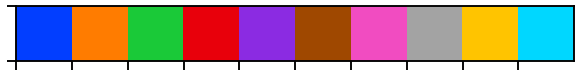

In [4]:
sns.palplot(SEABORN_PALETTE)

In [5]:
df_population = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')
df_population = df_population.groupby('State', as_index=False)['Population'].sum()
df_population = df_population.rename(columns={"State": "state", "Population": "population"})
df_population['state'] = df_population['state'].apply(lambda state: state.strip())
df_population = df_population.append(pd.DataFrame([['Puerto Rico', 3_193_400],
                                                   ['Guam', 165_768],
                                                   ['Virgin Islands', 104_680],
                                                   ['Northern Mariana Islands', 56_882]], columns=['state', 'population']))

df_population

state  population
0                    Alabama     4887871
1                     Alaska      737438
2                    Arizona     7171646
3                   Arkansas     3013825
4                 California    39557045
5                   Colorado     5695564
6                Connecticut     3572665
7                   Delaware      967171
8       District of Columbia      702455
9                    Florida    21299325
10                   Georgia    10519475
11                    Hawaii     1420491
12                     Idaho     1754208
13                  Illinois    12741080
14                   Indiana     6691878
15                      Iowa     3156145
16                    Kansas     2911505
17                  Kentucky     4468402
18                 Louisiana     4659978
19                     Maine     1338404
20                  Maryland     6042718
21             Massachusetts     6902149
22                  Michigan     9995915
23                 Minnesota     5611179
24               Mississippi     2986530
25                  Missouri     6126452
26                   Montana     1062305
27                  Nebraska     1929268
28                    Nevada     3034392
29             New Hampshire     1356458
30                New Jersey     8908520
31                New Mexico     2095428
32                  New York    19542209
33            North Carolina    10383620
34              North Dakota      760077
35                      Ohio    11689442
36                  Oklahoma     3943079
37                    Oregon     4190713
38              Pennsylvania    12807060
39              Rhode Island     1057315
40            South Carolina     5084127
41              South Dakota      882235
42                 Tennessee     6770010
43                     Texas    28701845
44                      Utah     3161105
45                   Vermont      626299
46                  Virginia     8330345
47                Washington     7535591
48             West Virginia     1805832
49                 Wisconsin     5813568
50                   Wyoming      577737
0                Puerto Rico     3193400
1                       Guam      165768
2             Virgin Islands      104680
3   Northern Mariana Islands       56882

In [6]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [7]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "STATE": "state", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

X          Y  OBJECTID        ID  \
0     -83.387732  39.348667      3001  12645123   
1     -81.919907  40.565095      3002  17244654   
2     -82.450635  40.048302      3003   2543055   
3     -83.755531  40.369542      3004   5843311   
4     -82.224713  41.295065      3005   5544074   
...          ...        ...       ...       ...   
7570  -89.634245  44.931130      7571   6254403   
7571  -87.954473  42.859866      7572   6653132   
7572 -117.566294  34.103714      7573  24091730   
7573 -117.071712  32.617494      7574  34491911   
7574 -122.405762  37.756576      7575  39094110   

                                                   NAME  \
0                       ADENA GREENFIELD MEDICAL CENTER   
1                                     POMERENE HOSPITAL   
2                             LICKING MEMORIAL HOSPITAL   
3                                   MARY RUTAN HOSPITAL   
4                                  MERCY ALLEN HOSPITAL   
...                                                 ...   
7570                          NORTH CENTRAL HEALTH CARE   
7571          MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL LLC   
7572                            KINDRED HOSPITAL RANCHO   
7573       PARADISE VALLEY HSP D/P APH BAYVIEW BEH HLTH   
7574  PRISCILLA CHAN & MARK ZUCKERBERG SAN FRANCISCO...   

                      ADDRESS              CITY state    ZIP           ZIP4  \
0         550 MIRABEAU STREET        GREENFIELD    OH  45123  NOT AVAILABLE   
1            981 WOOSTER ROAD       MILLERSBURG    OH  44654  NOT AVAILABLE   
2       1320 WEST MAIN STREET            NEWARK    OH  43055  NOT AVAILABLE   
3           205 PALMER AVENUE     BELLEFONTAINE    OH  43311  NOT AVAILABLE   
4      200 WEST LORAIN STREET           OBERLIN    OH  44074  NOT AVAILABLE   
...                       ...               ...   ...    ...            ...   
7570         1100 LAKEVIEW DR            WAUSAU    WI  54403  NOT AVAILABLE   
7571  10101 SOUTH 27TH STREET          FRANKLIN    WI  53132  NOT AVAILABLE   
7572   10841 WHITE OAK AVENUE  RANCHO CUCAMONGA    CA  91730  NOT AVAILABLE   
7573          330 MOSS STREET       CHULA VISTA    CA  91911  NOT AVAILABLE   
7574      1001 POTRERO AVENUE     SAN FRANCISCO    CA  94110  NOT AVAILABLE   

      ...                  VAL_DATE  \
0     ...  2014-02-10T00:00:00.000Z   
1     ...  2014-01-31T00:00:00.000Z   
2     ...  2014-02-10T00:00:00.000Z   
3     ...  2014-02-10T00:00:00.000Z   
4     ...  2014-02-10T00:00:00.000Z   
...   ...                       ...   
7570  ...  2014-02-10T00:00:00.000Z   
7571  ...  2014-01-13T00:00:00.000Z   
7572  ...  2014-02-10T00:00:00.000Z   
7573  ...  2014-02-10T00:00:00.000Z   
7574  ...  2014-02-10T00:00:00.000Z   

                                                WEBSITE       STATE_ID  \
0     http://www.adena.org/locations/detail.dT/adena...           1200   
1                       http://www.pomerenehospital.org           1202   
2                               http://www.lmhealth.org           1213   
3                              http://www.maryrutan.org           1214   
4     http://www.mercyonline.org/mercy_allen_hospita...           1219   
...                                                 ...            ...   
7570                              http://www.norcen.org            206   
7571                             http://www.mymosh.com/           1070   
7572                            http://www.khrancho.com  NOT AVAILABLE   
7573                                      NOT AVAILABLE  NOT AVAILABLE   
7574                             https://sfgh.ucsf.edu/  NOT AVAILABLE   

                            ALT_NAME ST_FIPS               OWNER TTL_STAFF  \
0                      NOT AVAILABLE      39          NON-PROFIT      -999   
1                      NOT AVAILABLE      39  GOVERNMENT - LOCAL      -999   
2                      NOT AVAILABLE      39          NON-PROFIT      -999   
3                      NOT AVAILABLE      39          NON-PROFIT      -999

In [8]:
df_hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'state', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'fips',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'beds', 'TRAUMA',
       'HELIPAD'],
      dtype='object')

In [9]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

fips   beds
158    6037  30371
474   17031  18259
2142  48201  15996
1506  36061  11052
291   12086  10243
...     ...    ...
1322  30071      6
1542  37015      6
1968  46077      6
890   22007      6
2206  48381      4

[2545 rows x 2 columns]

In [10]:
# for state in beds_per_state['state'].values: print(f"'{state}' : '{state}'")

In [11]:
state_dict = {
    'CA' : 'California',
    'TX' : 'Texas',
    'FL' : 'Florida',
    'NY' : 'New York',
    'OH' : 'Ohio',
    'PA' : 'Pennsylvania',
    'IL' : 'Illinois',
    'NJ' : 'New Jersey',
    'GA' : 'Georgia',
    'NC' : 'North Carolina',
    'MI' : 'Michigan',
    'TN' : 'Tennessee',
    'MO' : 'Missouri',
    'VA' : 'Virginia',
    'MA' : 'Massachusetts',
    'IN' : 'Indiana',
    'WI' : 'Wisconsin',
    'AL' : 'Alabama',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'WA' : 'Washington',
    'MN' : 'Minnesota',
    'AZ' : 'Arizona',
    'OK' : 'Oklahoma',
    'SC' : 'South Carolina',
    'MS' : 'Mississippi',
    'IA' : 'Iowa',
    'MD' : 'Maryland',
    'CO' : 'Colorado',
    'AR' : 'Arkansas',
    'KS' : 'Kansas',
    'CT' : 'Connecticut',
    'WV' : 'West Virginia',
    'NV' : 'Nevada',
    'OR' : 'Oregon',
    'NE' : 'Nebraska',
    'PR' : 'Puerto Rico',
    'UT' : 'Utah',
    'NM' : 'New Mexico',
    'ME' : 'Maine',
    'DC' : 'District of Columbia',
    'MT' : 'Montana',
    'RI' : 'Rhode Island',
    'ND' : 'North Dakota',
    'ID' : 'Idaho',
    'SD' : 'South Dakota',
    'NH' : 'New Hampshire',
    'HI' : 'Hawaii',
    'DE' : 'Delaware',
    'WY' : 'Wyoming',
    'AK' : 'Alaska',
    'VT' : 'Vermont'
}

In [12]:
beds_per_state = df_hospitals.groupby('state', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_state['state'] = beds_per_state['state'].apply(lambda abbrev: state_dict.get(abbrev))
beds_per_state

state    beds
4             California  104034
44                 Texas   91310
9                Florida   72088
34              New York   57083
35                  Ohio   49177
38          Pennsylvania   46167
14              Illinois   35811
31            New Jersey   31359
10               Georgia   30778
27        North Carolina   27175
22              Michigan   26632
43             Tennessee   25551
24              Missouri   24026
46              Virginia   22196
19         Massachusetts   20882
15               Indiana   19415
49             Wisconsin   19131
1                Alabama   19000
17              Kentucky   18497
18             Louisiana   18413
48            Washington   15873
23             Minnesota   15778
3                Arizona   15452
36              Oklahoma   15177
41        South Carolina   15056
25           Mississippi   15020
12                  Iowa   13785
20              Maryland   13557
5               Colorado   11899
2               Arkansas   11699
16                Kansas   11261
6            Connecticut    9451
50         West Virginia    7772
33                Nevada    7771
37                Oregon    7624
29              Nebraska    7394
39           Puerto Rico    6334
45                  Utah    6110
32            New Mexico    5132
21                 Maine    4470
7   District of Columbia    4304
26               Montana    4126
40          Rhode Island    3985
28          North Dakota    3878
13                 Idaho    3802
42          South Dakota    3407
30         New Hampshire    3398
11                Hawaii    3365
8               Delaware    2780
51               Wyoming    1829
0                 Alaska    1813
47               Vermont    1468

In [13]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_states['date'] = pd.to_datetime(df_states['date'])
df_states = df_states.rename(columns={'cases': 'positive_tests'})
df_states = df_states.loc[df_states['date'] > '2020-03-04']
df_states = df_states.merge(df_population, how='left', on='state')
df_states = df_states.merge(beds_per_state, how='left', on='state')
df_states['positive_tests_per_100k_people'] = df_states['positive_tests'] / (df_states['population']/100_000)
df_states['beds_per_100k_people'] = df_states['beds'] / (df_states['population']/100_000)
df_states


date          state  fips  positive_tests  deaths  population  \
0    2020-03-05        Arizona     4               2       0     7171646   
1    2020-03-05     California     6              67       1    39557045   
2    2020-03-05       Colorado     8               2       0     5695564   
3    2020-03-05        Florida    12               4       0    21299325   
4    2020-03-05        Georgia    13               2       0    10519475   
...         ...            ...   ...             ...     ...         ...   
1468 2020-04-03       Virginia    51            2012      46     8330345   
1469 2020-04-03     Washington    53            6966     293     7535591   
1470 2020-04-03  West Virginia    54             242       2     1805832   
1471 2020-04-03      Wisconsin    55            1916      49     5813568   
1472 2020-04-03        Wyoming    56             166       0      577737   

          beds  positive_tests_per_100k_people  beds_per_100k_people  
0      15452.0                        0.027888            215.459603  
1     104034.0                        0.169376            262.997400  
2      11899.0                        0.035115            208.916975  
3      72088.0                        0.018780            338.452040  
4      30778.0                        0.019012            292.581141  
...        ...                             ...                   ...  
1468   22196.0                       24.152661            266.447548  
1469   15873.0                       92.441323            210.640413  
1470    7772.0                       13.401025            430.383336  
1471   19131.0                       32.957385            329.075019  
1472    1829.0                       28.732797            316.580036  

[1473 rows x 9 columns]

In [14]:
most_recent_date = df_states['date'].sort_values().unique()[-1]
most_recent_date

numpy.datetime64('2020-04-03T00:00:00.000000000')

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.rename(columns={'cases': 'positive_tests'})
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df = df.merge(beds_per_county, how='left', on='fips').sort_values(by='positive_tests', ascending=False)
df_50 = df.head(50)
df


date       county           state   fips  positive_tests  deaths  \
29461  2020-04-03  Westchester        New York  36119           12350      67   
29434  2020-04-03       Nassau        New York  36059           12024     138   
27167  2020-04-02  Westchester        New York  36119           11566      67   
24935  2020-04-01  Westchester        New York  36119           10683      25   
27140  2020-04-02       Nassau        New York  36059           10587      95   
...           ...          ...             ...    ...             ...     ...   
13237  2020-03-26     Scotland  North Carolina  37165               1       0   
13238  2020-03-26       Stanly  North Carolina  37167               1       0   
13244  2020-03-26        Wayne  North Carolina  37191               1       0   
13248  2020-03-26         Dunn    North Dakota  38025               1       0   
15194  2020-03-27       Aurora    South Dakota  46003               1       0   

         beds  
29461  3235.0  
29434  4343.0  
27167  3235.0  
24935  3235.0  
27140  4343.0  
...       ...  
13237   104.0  
13238   109.0  
13244   316.0  
13248     NaN  
15194     NaN  

[30388 rows x 7 columns]

In [16]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
state         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

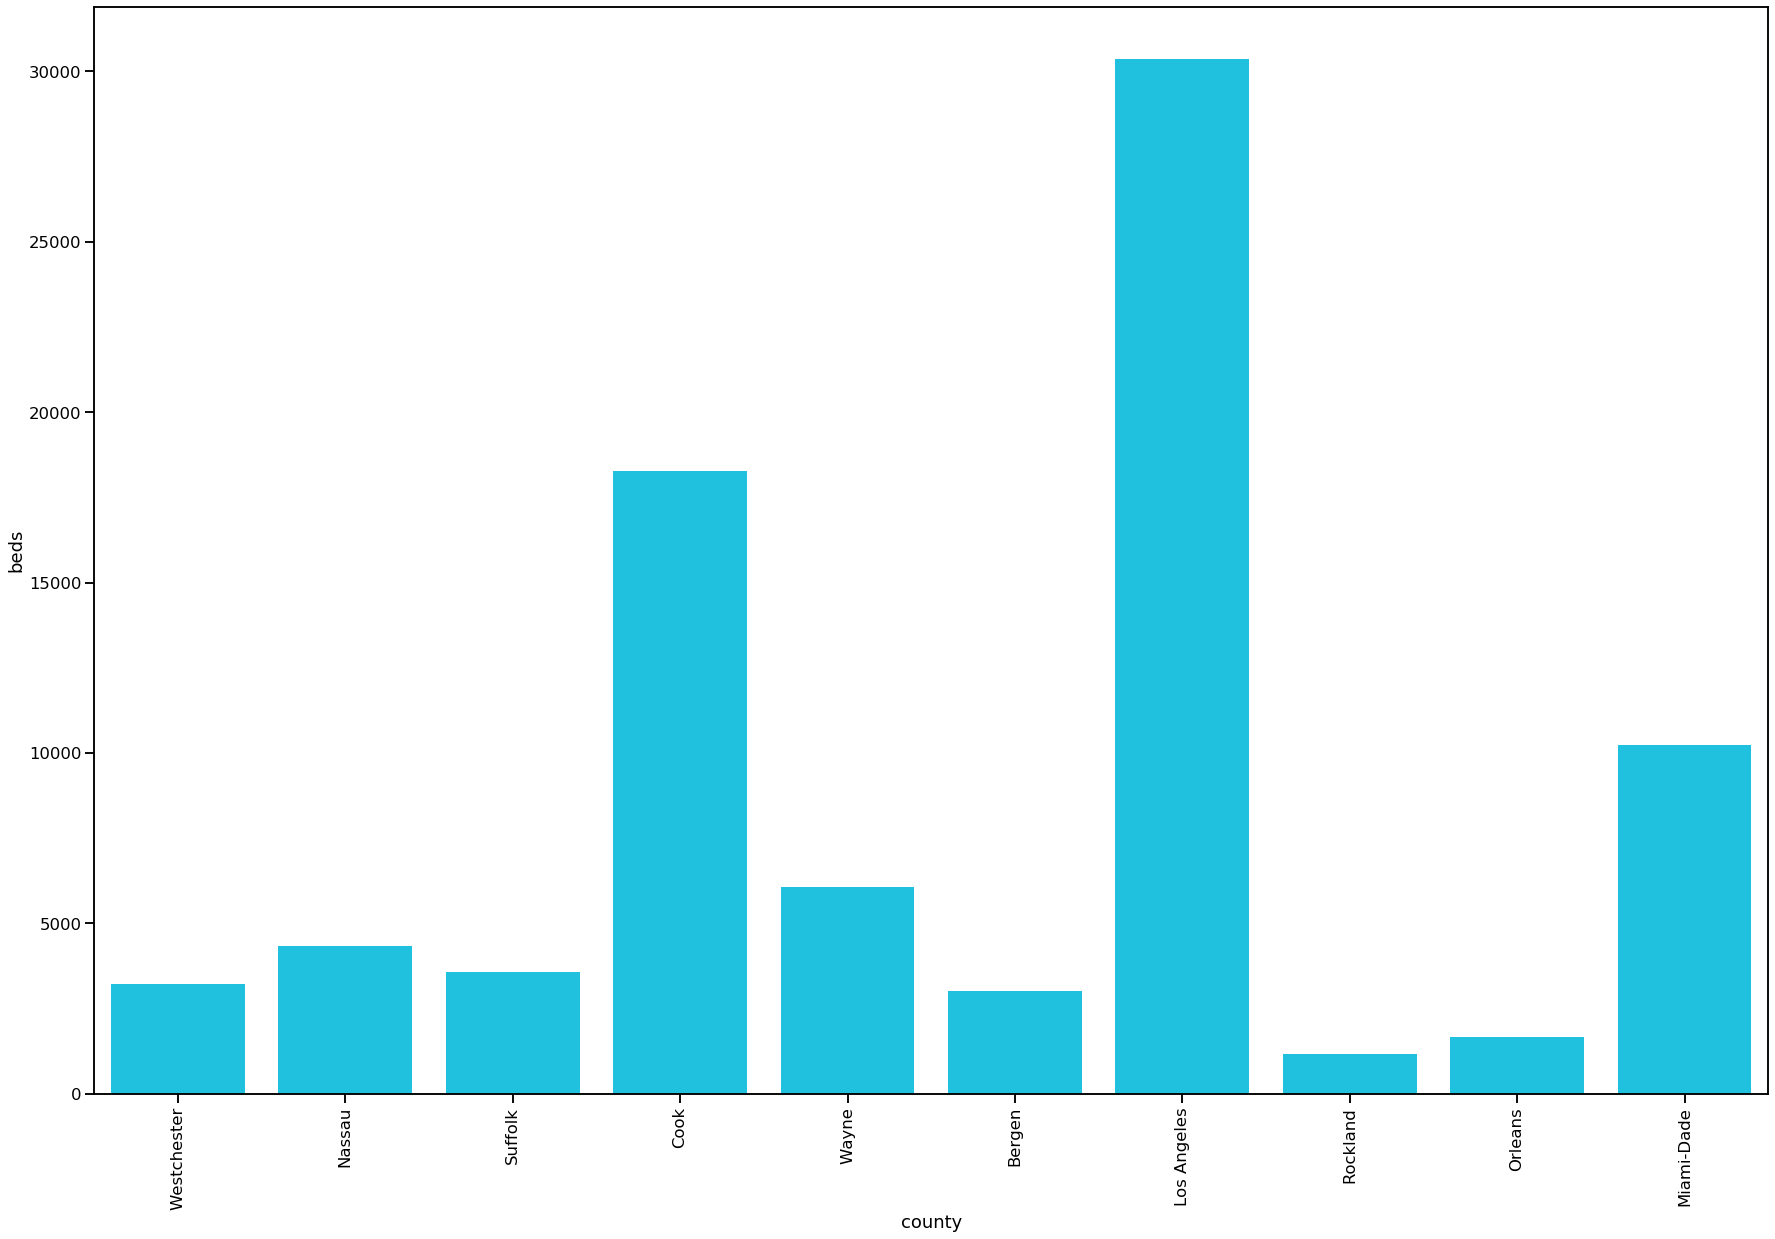

In [17]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_50['county'], y=df_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);

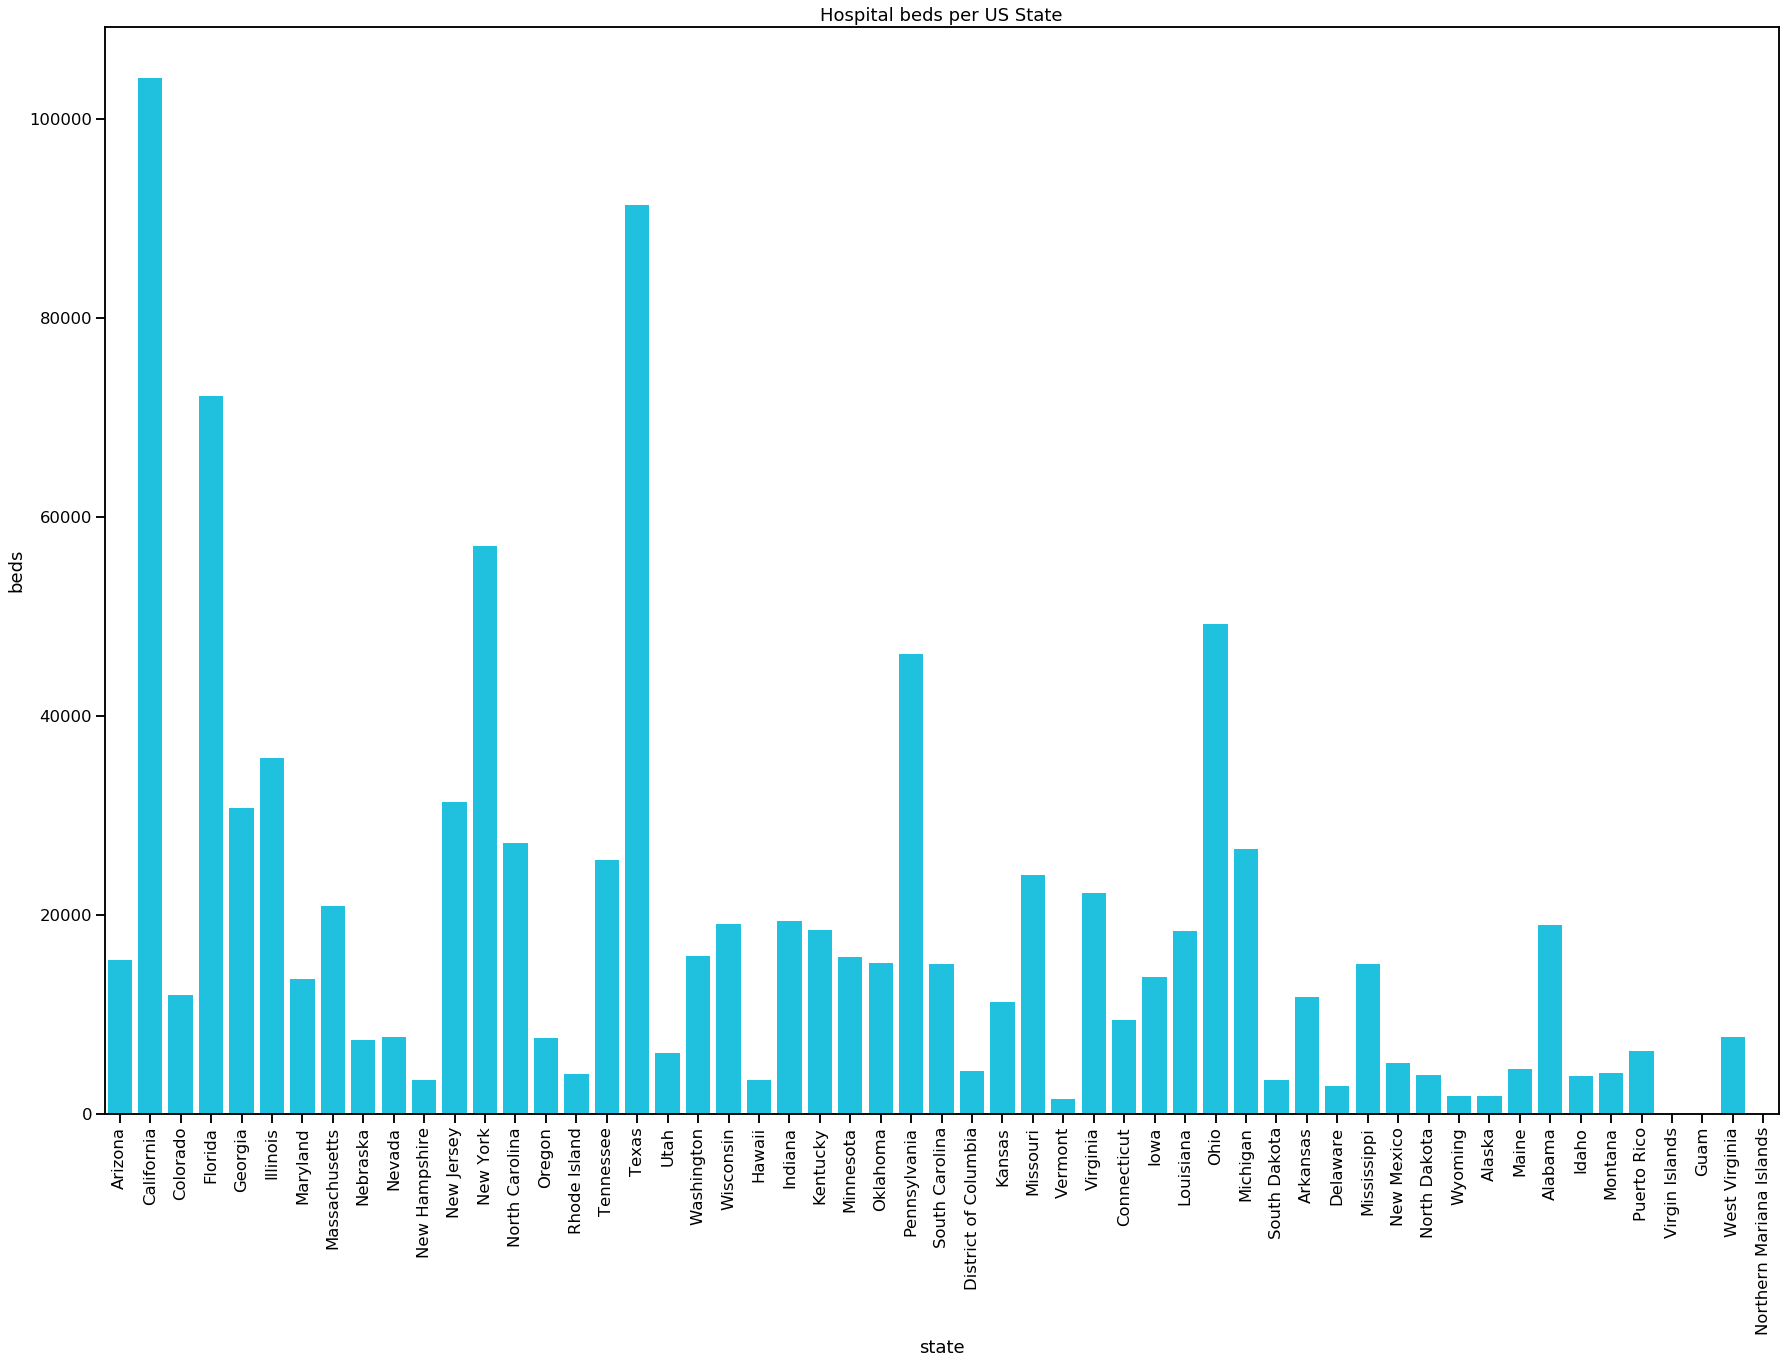

In [18]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per US State')
plt.xticks(rotation=90);

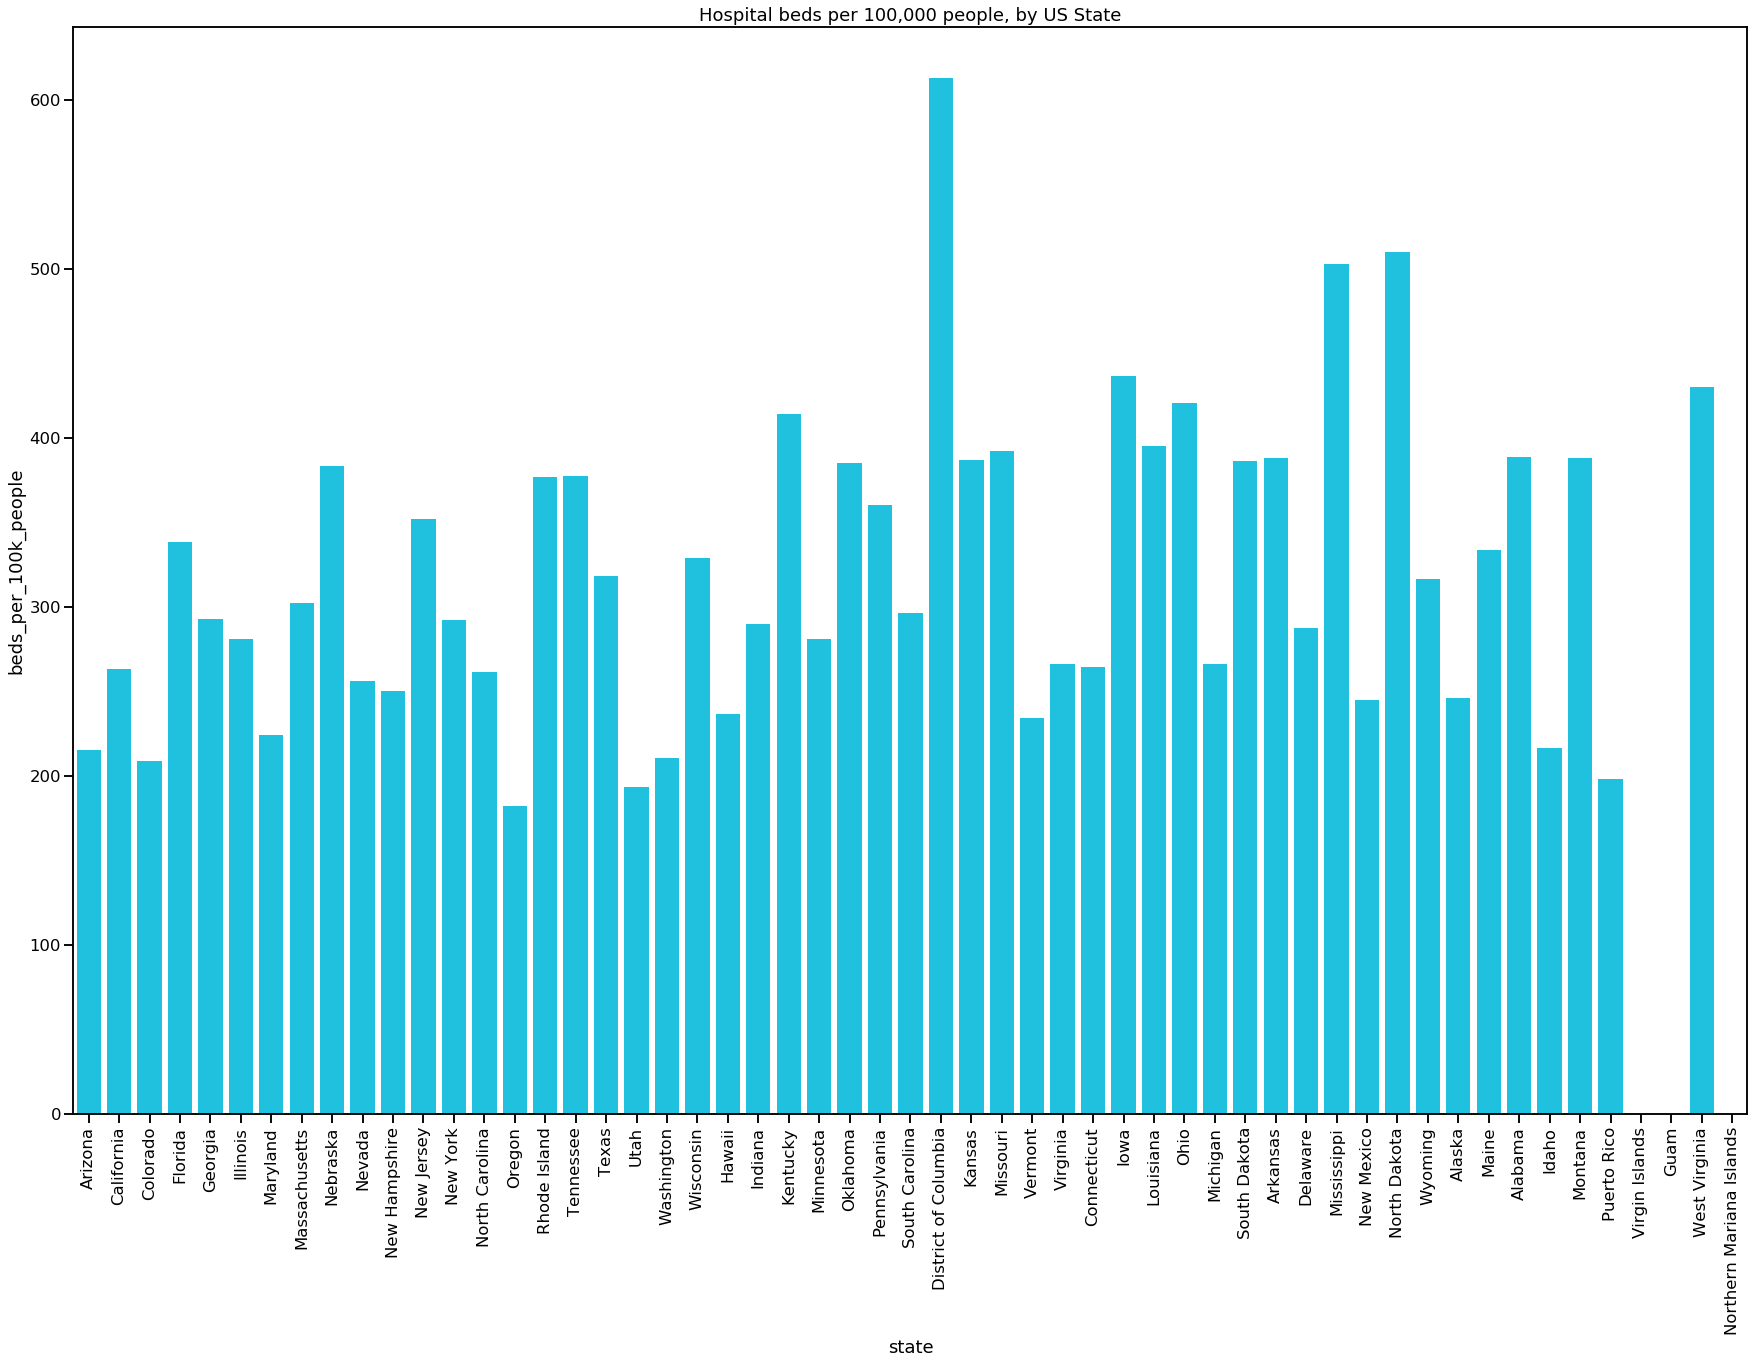

In [19]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds_per_100k_people'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per 100,000 people, by US State')
plt.xticks(rotation=90);

In [20]:
# df_ny = df_states.loc[df_states['state'] == 'New York']
# df_nj = df_states.loc[df_states['state'] == 'New Jersey']

In [21]:
df_states_latest = df_states.loc[df_states['date'] == most_recent_date].sort_values(by='positive_tests', ascending=False)
df_states_latest

date                     state  fips  positive_tests  deaths  \
1451 2020-04-03                  New York    36          102870    2935   
1449 2020-04-03                New Jersey    34           29895     647   
1441 2020-04-03                  Michigan    26           12670     478   
1422 2020-04-03                California     6           12569     282   
1440 2020-04-03             Massachusetts    25           10402     192   
1437 2020-04-03                 Louisiana    22           10297     370   
1427 2020-04-03                   Florida    12           10260     169   
1432 2020-04-03                  Illinois    17            8904     211   
1458 2020-04-03              Pennsylvania    42            8420     102   
1469 2020-04-03                Washington    53            6966     293   
1428 2020-04-03                   Georgia    13            5967     198   
1464 2020-04-03                     Texas    48            5669      97   
1424 2020-04-03               Connecticut     9            4915     132   
1423 2020-04-03                  Colorado     8            4182     110   
1433 2020-04-03                   Indiana    18            3437     102   
1455 2020-04-03                      Ohio    39            3312      91   
1463 2020-04-03                 Tennessee    47            2913      36   
1439 2020-04-03                  Maryland    24            2758      42   
1444 2020-04-03                  Missouri    29            2113      31   
1452 2020-04-03            North Carolina    37            2093      19   
1468 2020-04-03                  Virginia    51            2012      46   
1471 2020-04-03                 Wisconsin    55            1916      49   
1420 2020-04-03                   Arizona     4            1769      41   
1461 2020-04-03            South Carolina    45            1700      34   
1447 2020-04-03                    Nevada    32            1549      43   
1418 2020-04-03                   Alabama     1            1535      38   
1443 2020-04-03               Mississippi    28            1358      29   
1465 2020-04-03                      Utah    49            1260       7   
1431 2020-04-03                     Idaho    16            1013      10   
1456 2020-04-03                  Oklahoma    40             988      38   
1457 2020-04-03                    Oregon    41             899      22   
1442 2020-04-03                 Minnesota    27             789      22   
1436 2020-04-03                  Kentucky    21             770      34   
1426 2020-04-03      District of Columbia    11             757      15   
1421 2020-04-03                  Arkansas     5             738      12   
1460 2020-04-03              Rhode Island    44             711      14   
1434 2020-04-03                      Iowa    19             699      11   
1435 2020-04-03                    Kansas    20             624      19   
1448 2020-04-03             New Hampshire    33             540       7   
1450 2020-04-03                New Mexico    35             495      10   
1425 2020-04-03                  Delaware    10             450      14   
1438 2020-04-03                     Maine    23             432       9   
1466 2020-04-03                   Vermont    50             389      17   
1459 2020-04-03               Puerto Rico    72             378      15   
1430 2020-04-03                    Hawaii    15             317       3   
1446 2020-04-03                  Nebraska    31             296       6   
1445 2020-04-03                   Montana    30             262       6   
1470 2020-04-03             West Virginia    54             242       2   
1462 2020-04-03              South Dakota    46             187       2   
1453 2020-04-03              North Dakota    38             173       3   
1472 2020-04-03                   Wyoming    56             166       0   
1419 2020-04-03                    Alaska     2             156       2   
1429 2020-04-03                     

In [22]:
group_size = 10
state_groups = []

# Initialize empty arrays for groups of states
for i in np.arange(0, len(df_states_latest['state']), group_size): 
    state_groups.append([])
    
for i, state in enumerate(df_states_latest['state']):
    state_groups[i // group_size].append(state)

state_groups

[['New York',
  'New Jersey',
  'Michigan',
  'California',
  'Massachusetts',
  'Louisiana',
  'Florida',
  'Illinois',
  'Pennsylvania',
  'Washington'],
 ['Georgia',
  'Texas',
  'Connecticut',
  'Colorado',
  'Indiana',
  'Ohio',
  'Tennessee',
  'Maryland',
  'Missouri',
  'North Carolina'],
 ['Virginia',
  'Wisconsin',
  'Arizona',
  'South Carolina',
  'Nevada',
  'Alabama',
  'Mississippi',
  'Utah',
  'Idaho',
  'Oklahoma'],
 ['Oregon',
  'Minnesota',
  'Kentucky',
  'District of Columbia',
  'Arkansas',
  'Rhode Island',
  'Iowa',
  'Kansas',
  'New Hampshire',
  'New Mexico'],
 ['Delaware',
  'Maine',
  'Vermont',
  'Puerto Rico',
  'Hawaii',
  'Nebraska',
  'Montana',
  'West Virginia',
  'South Dakota',
  'North Dakota'],
 ['Wyoming', 'Alaska', 'Guam', 'Virgin Islands', 'Northern Mariana Islands']]

In [23]:
# states_0 = df_states.loc[df_states['state'].isin(state_groups[0])]

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_0['date'], y=states_0['positive_tests'], hue=states_0['state'], marker="o", dashes=False, ci=False)
# plt.xticks(rotation=90);
# plt.tight_layout()
# plt.show()

/Users/megarock/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


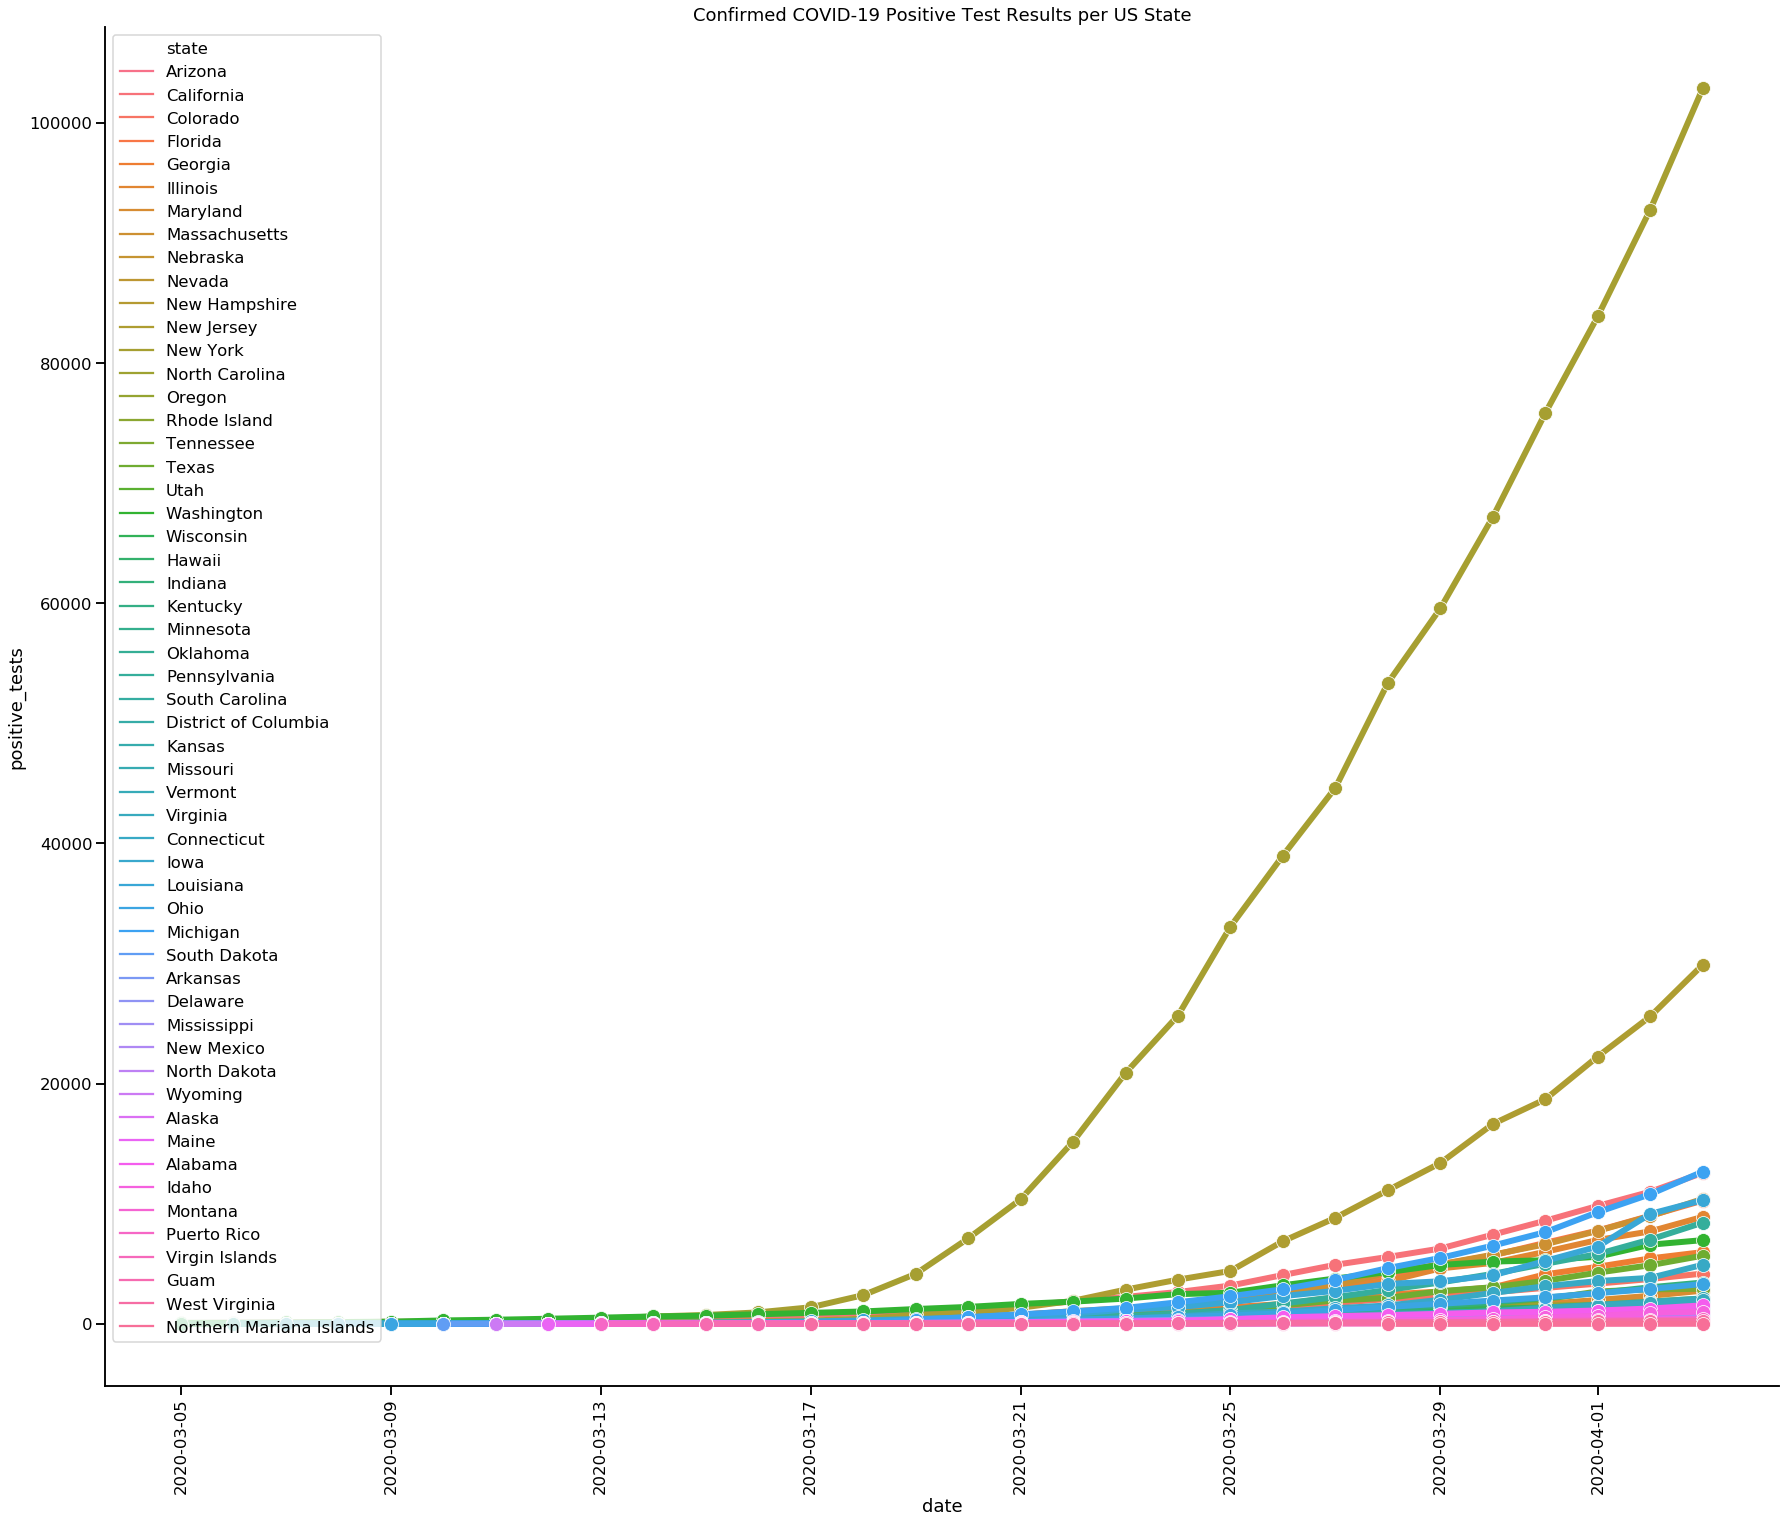

In [24]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['positive_tests'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Positive Test Results per US State')
plt.xticks(rotation=90);
sns.despine()

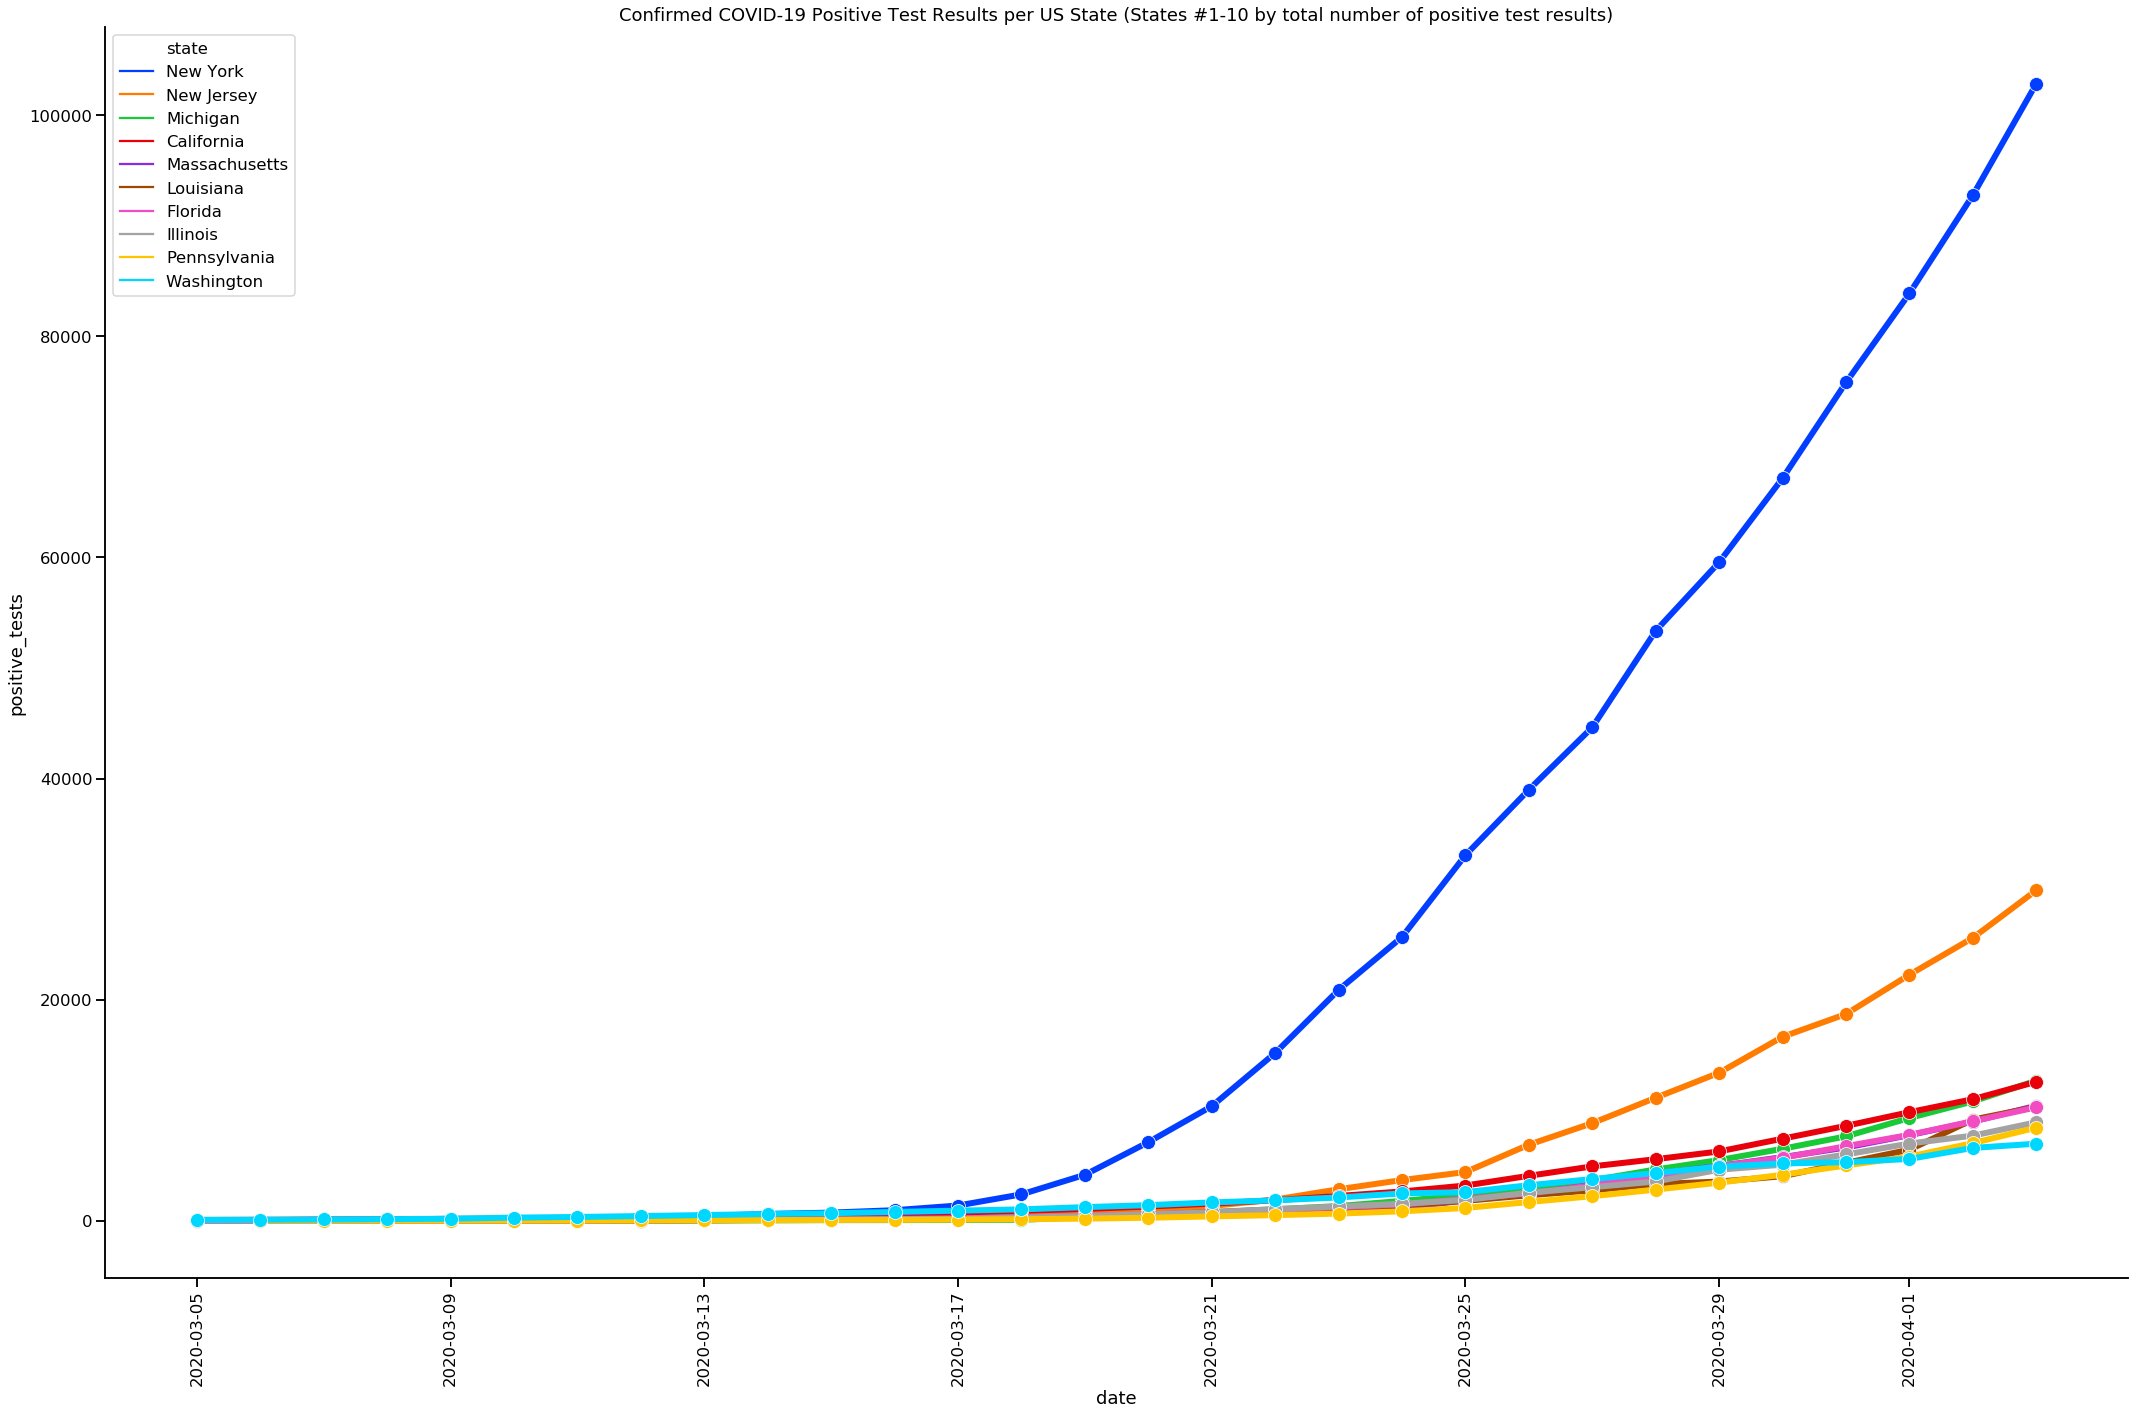

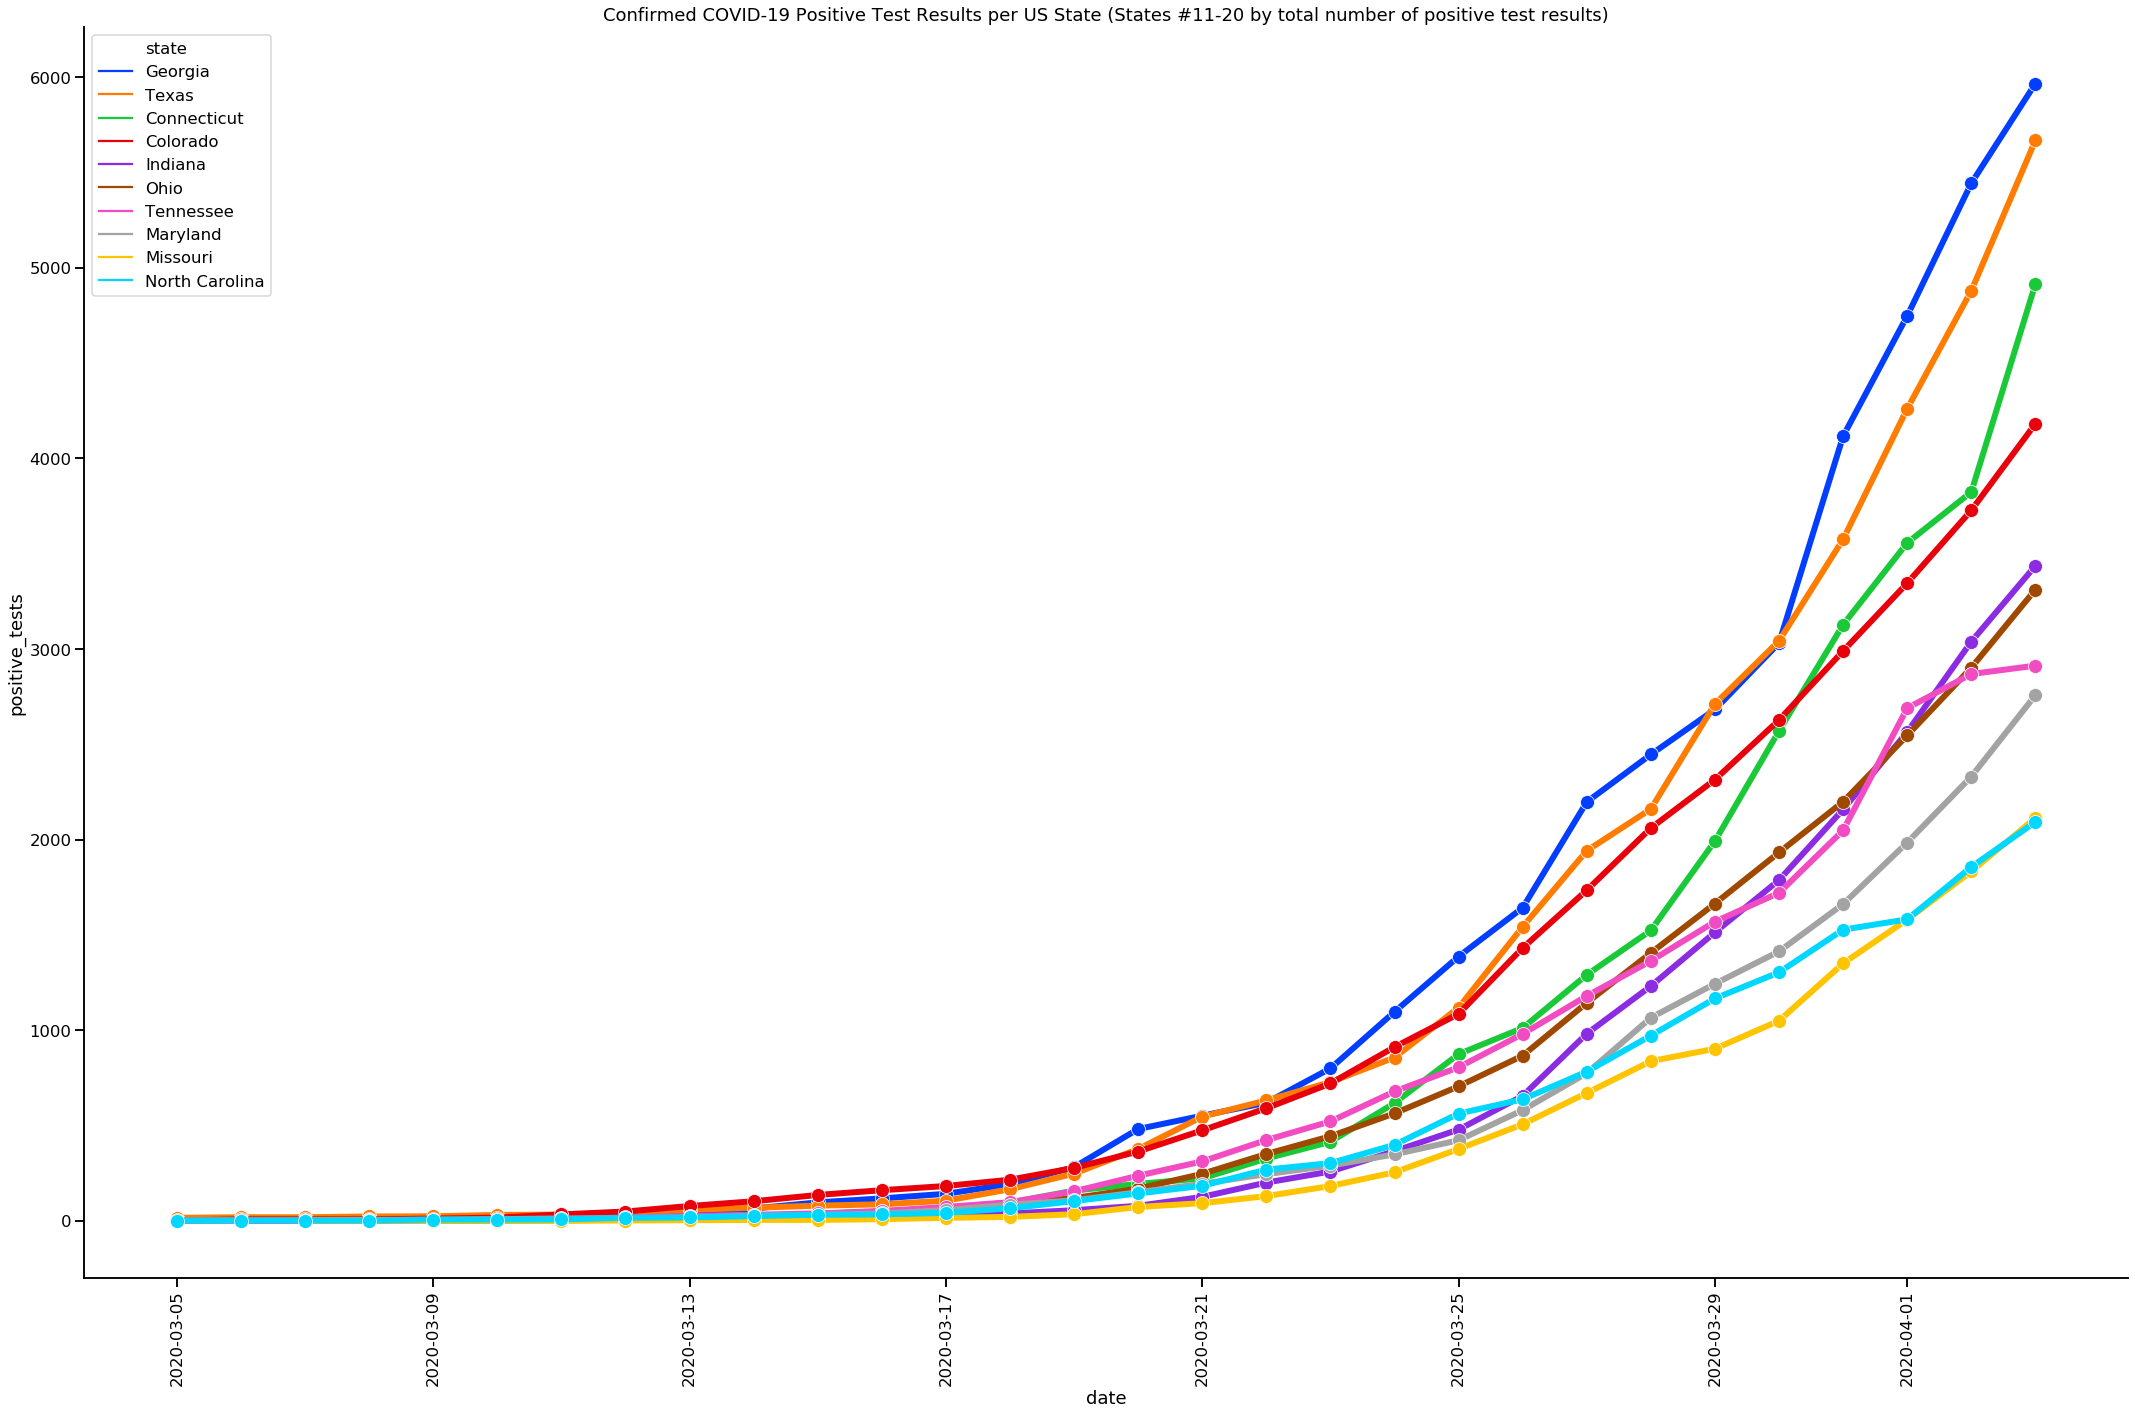

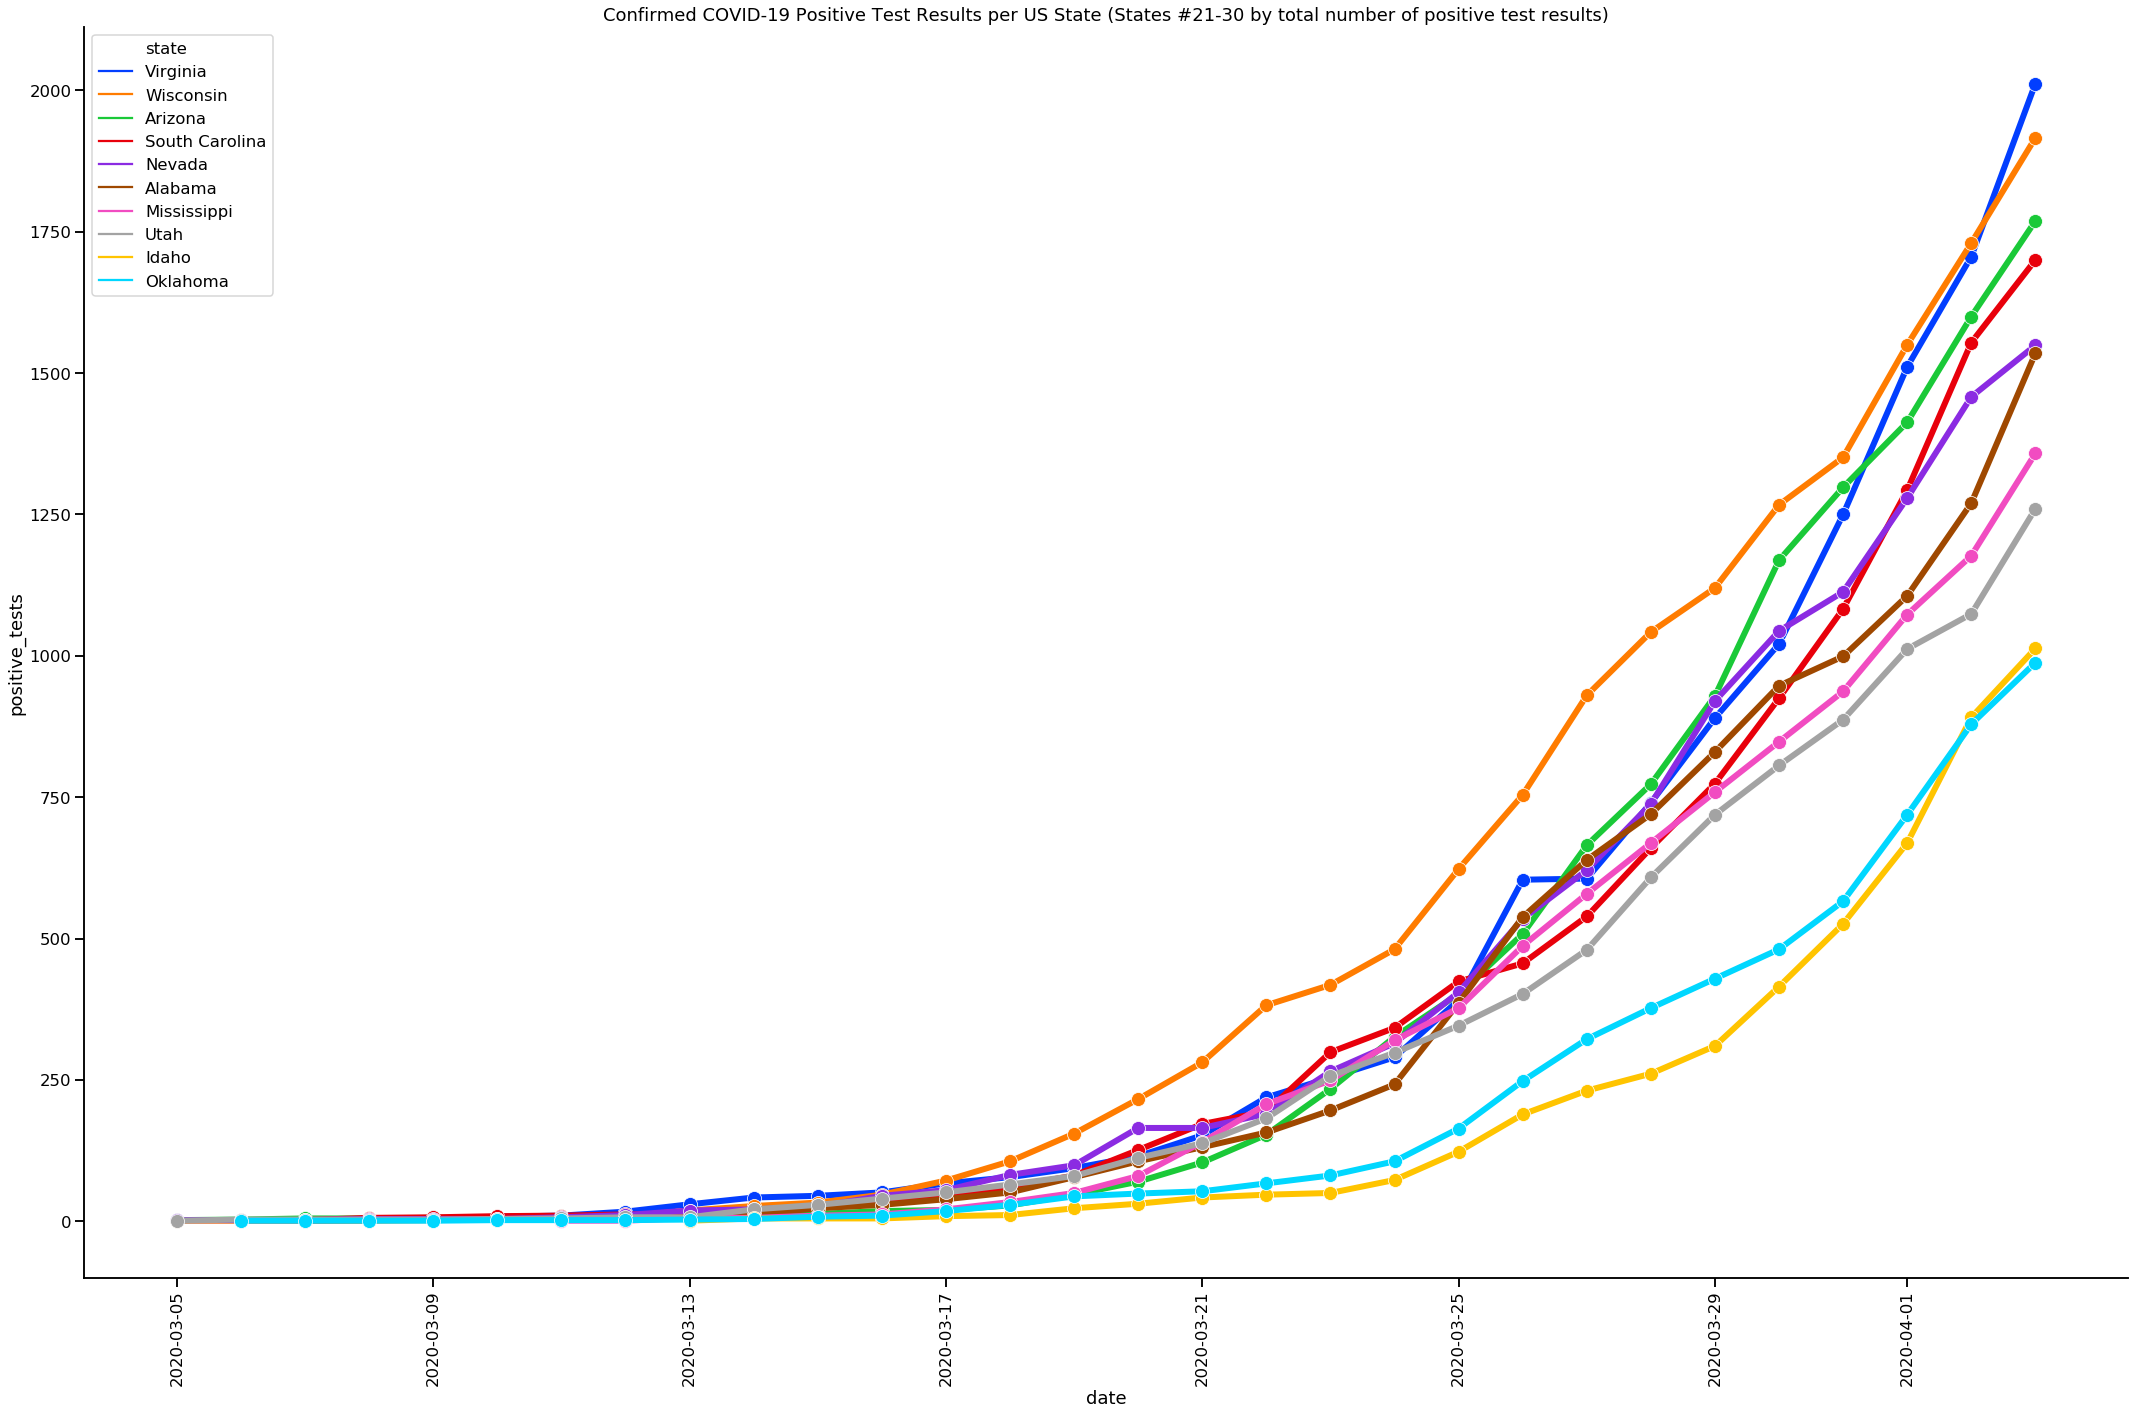

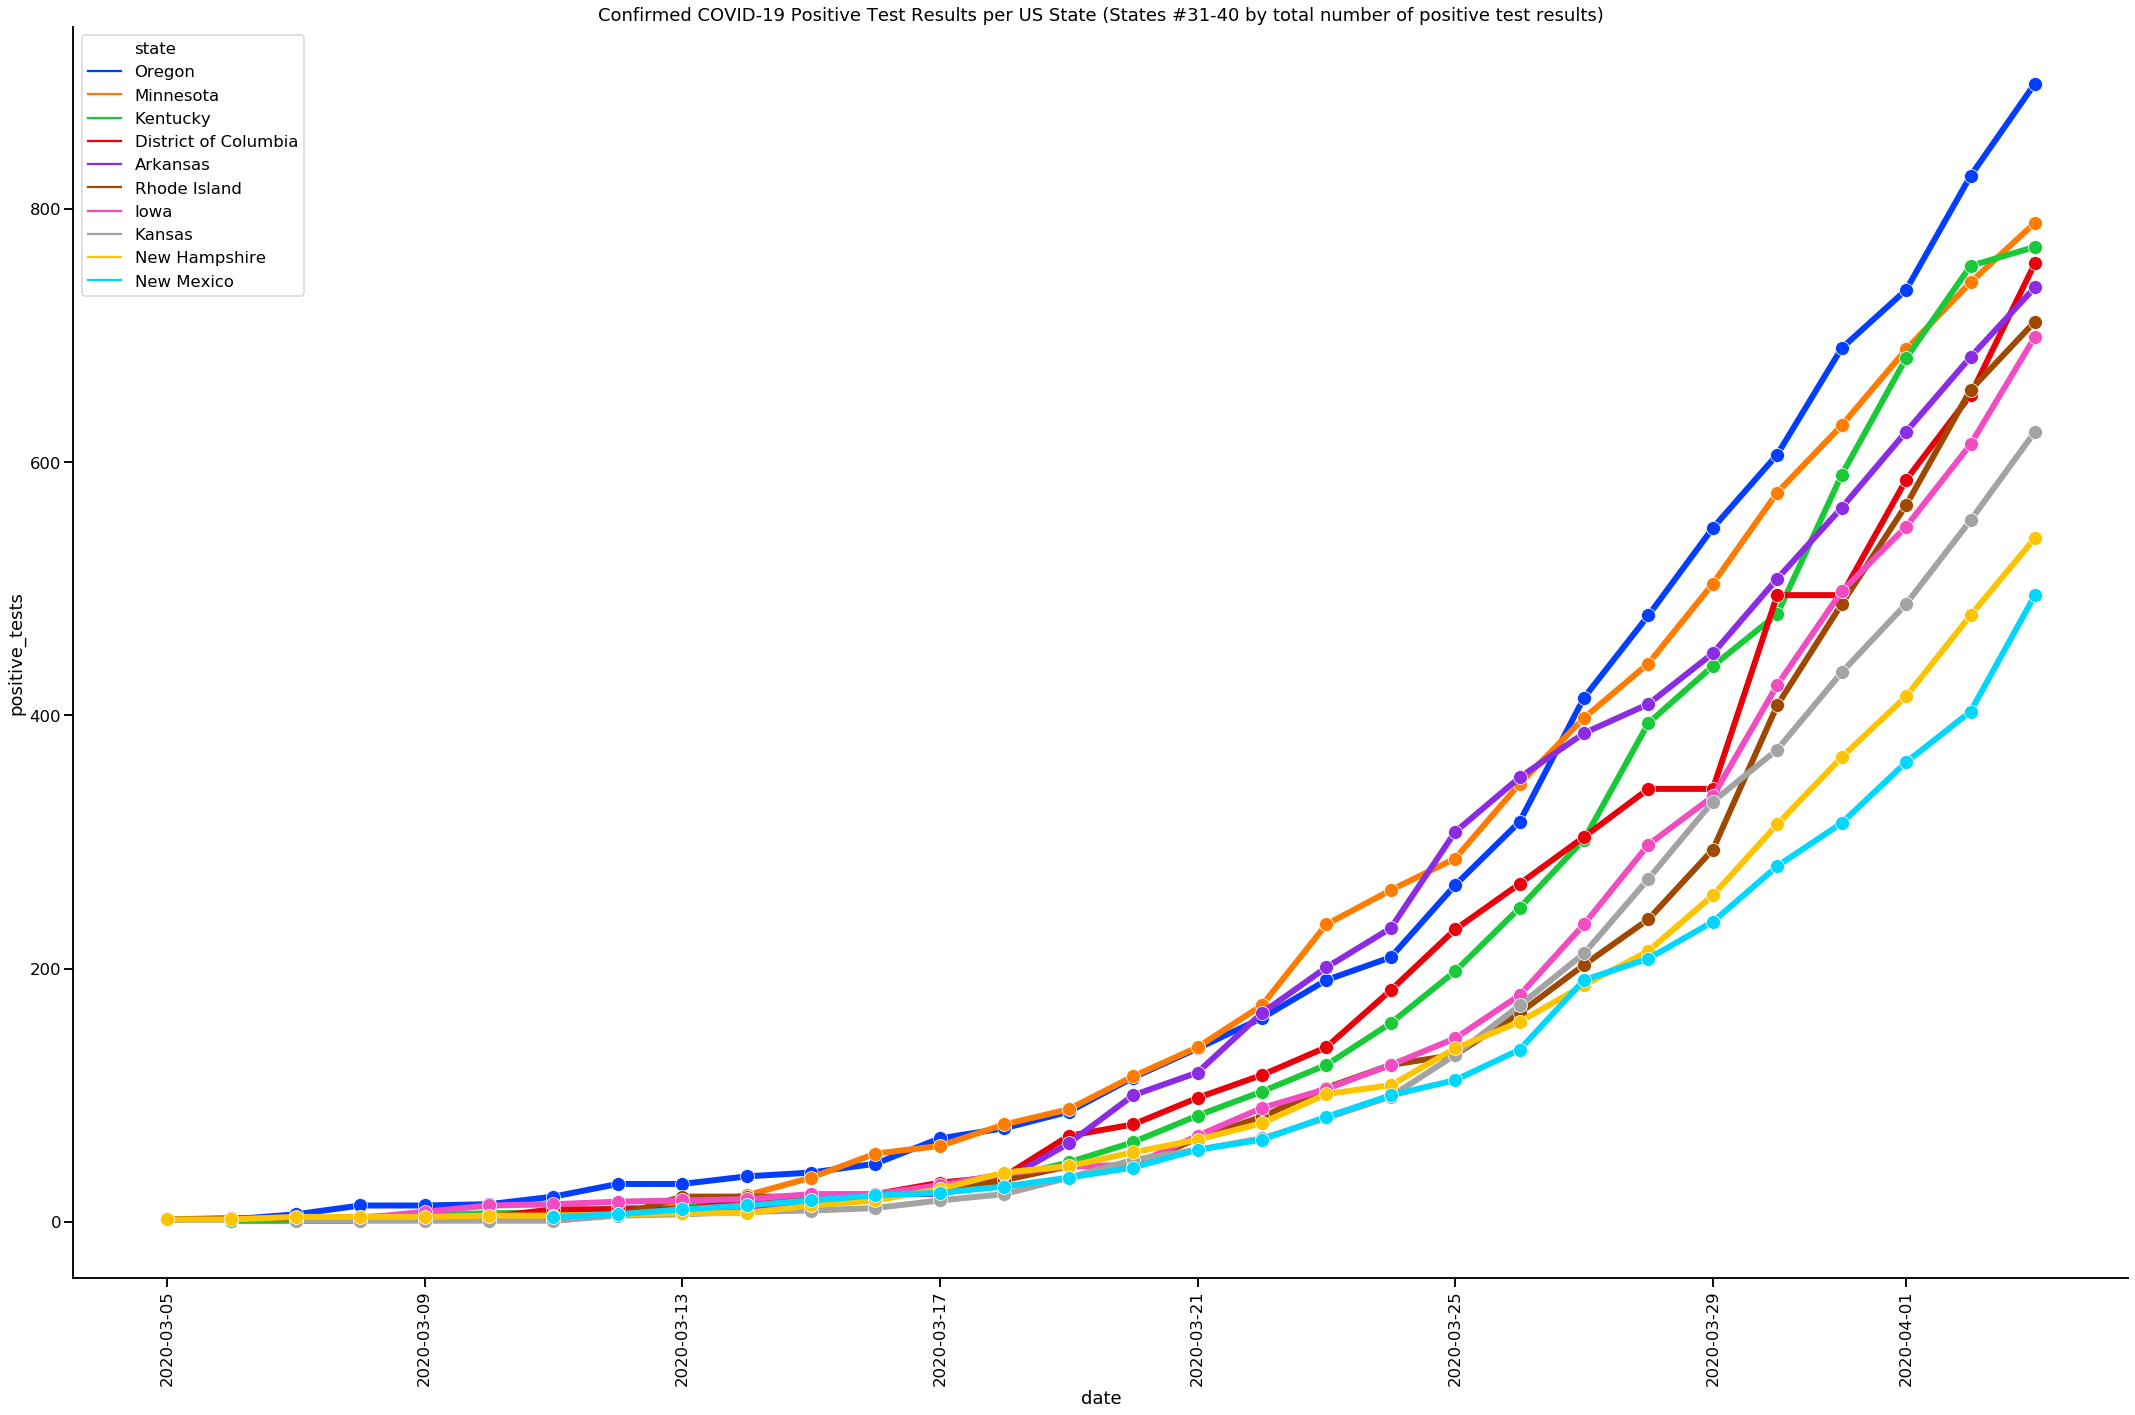

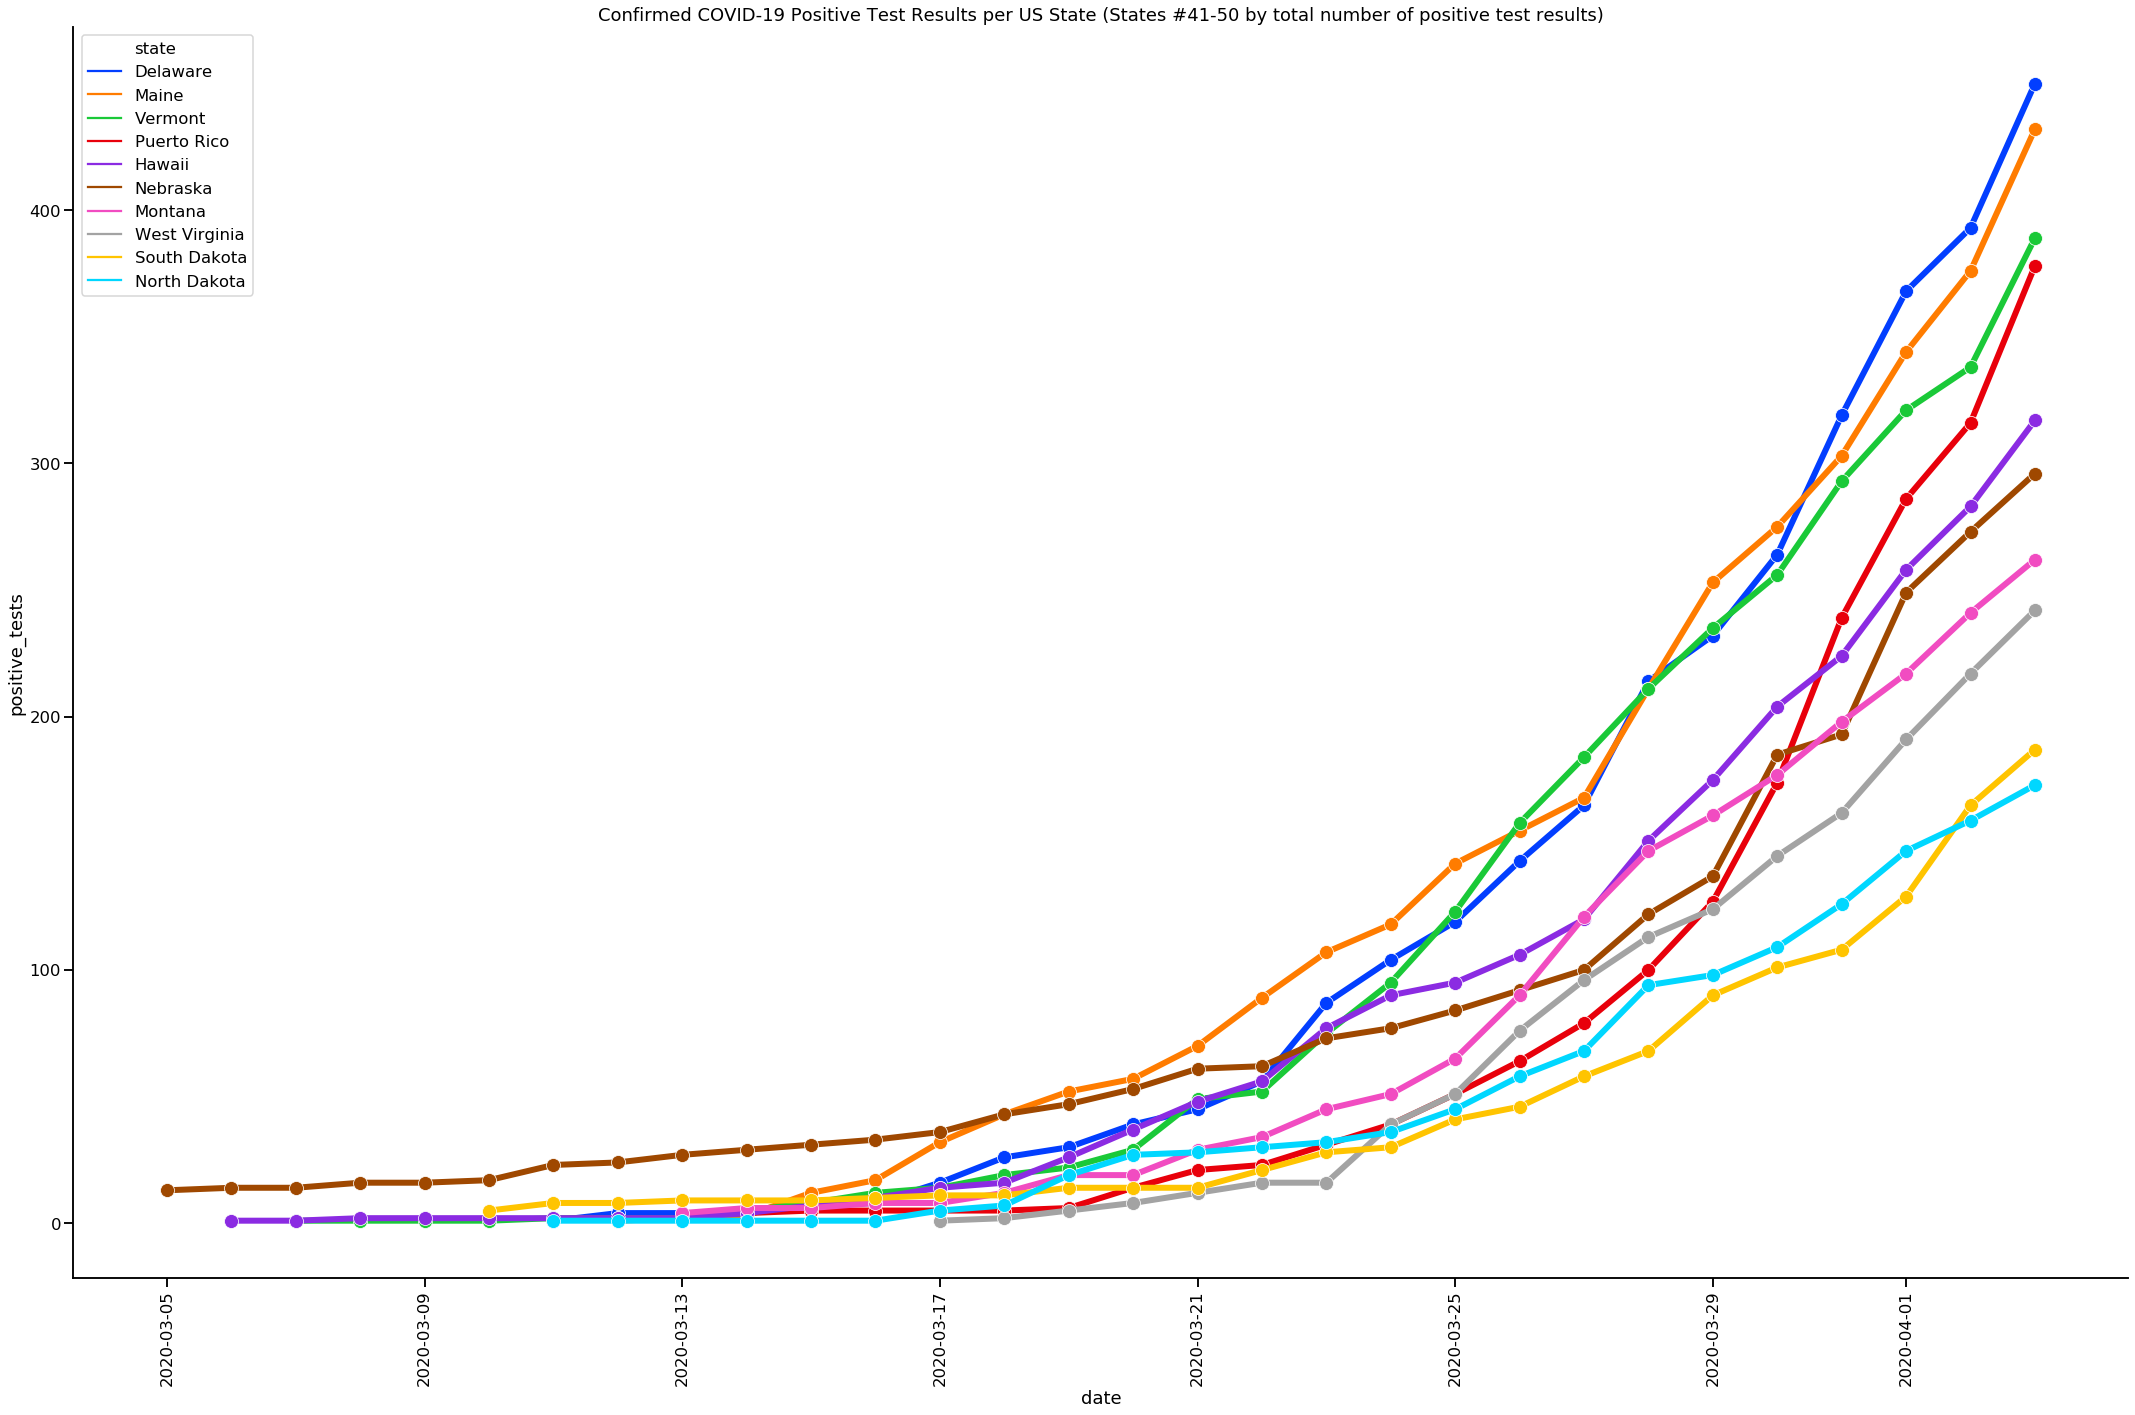

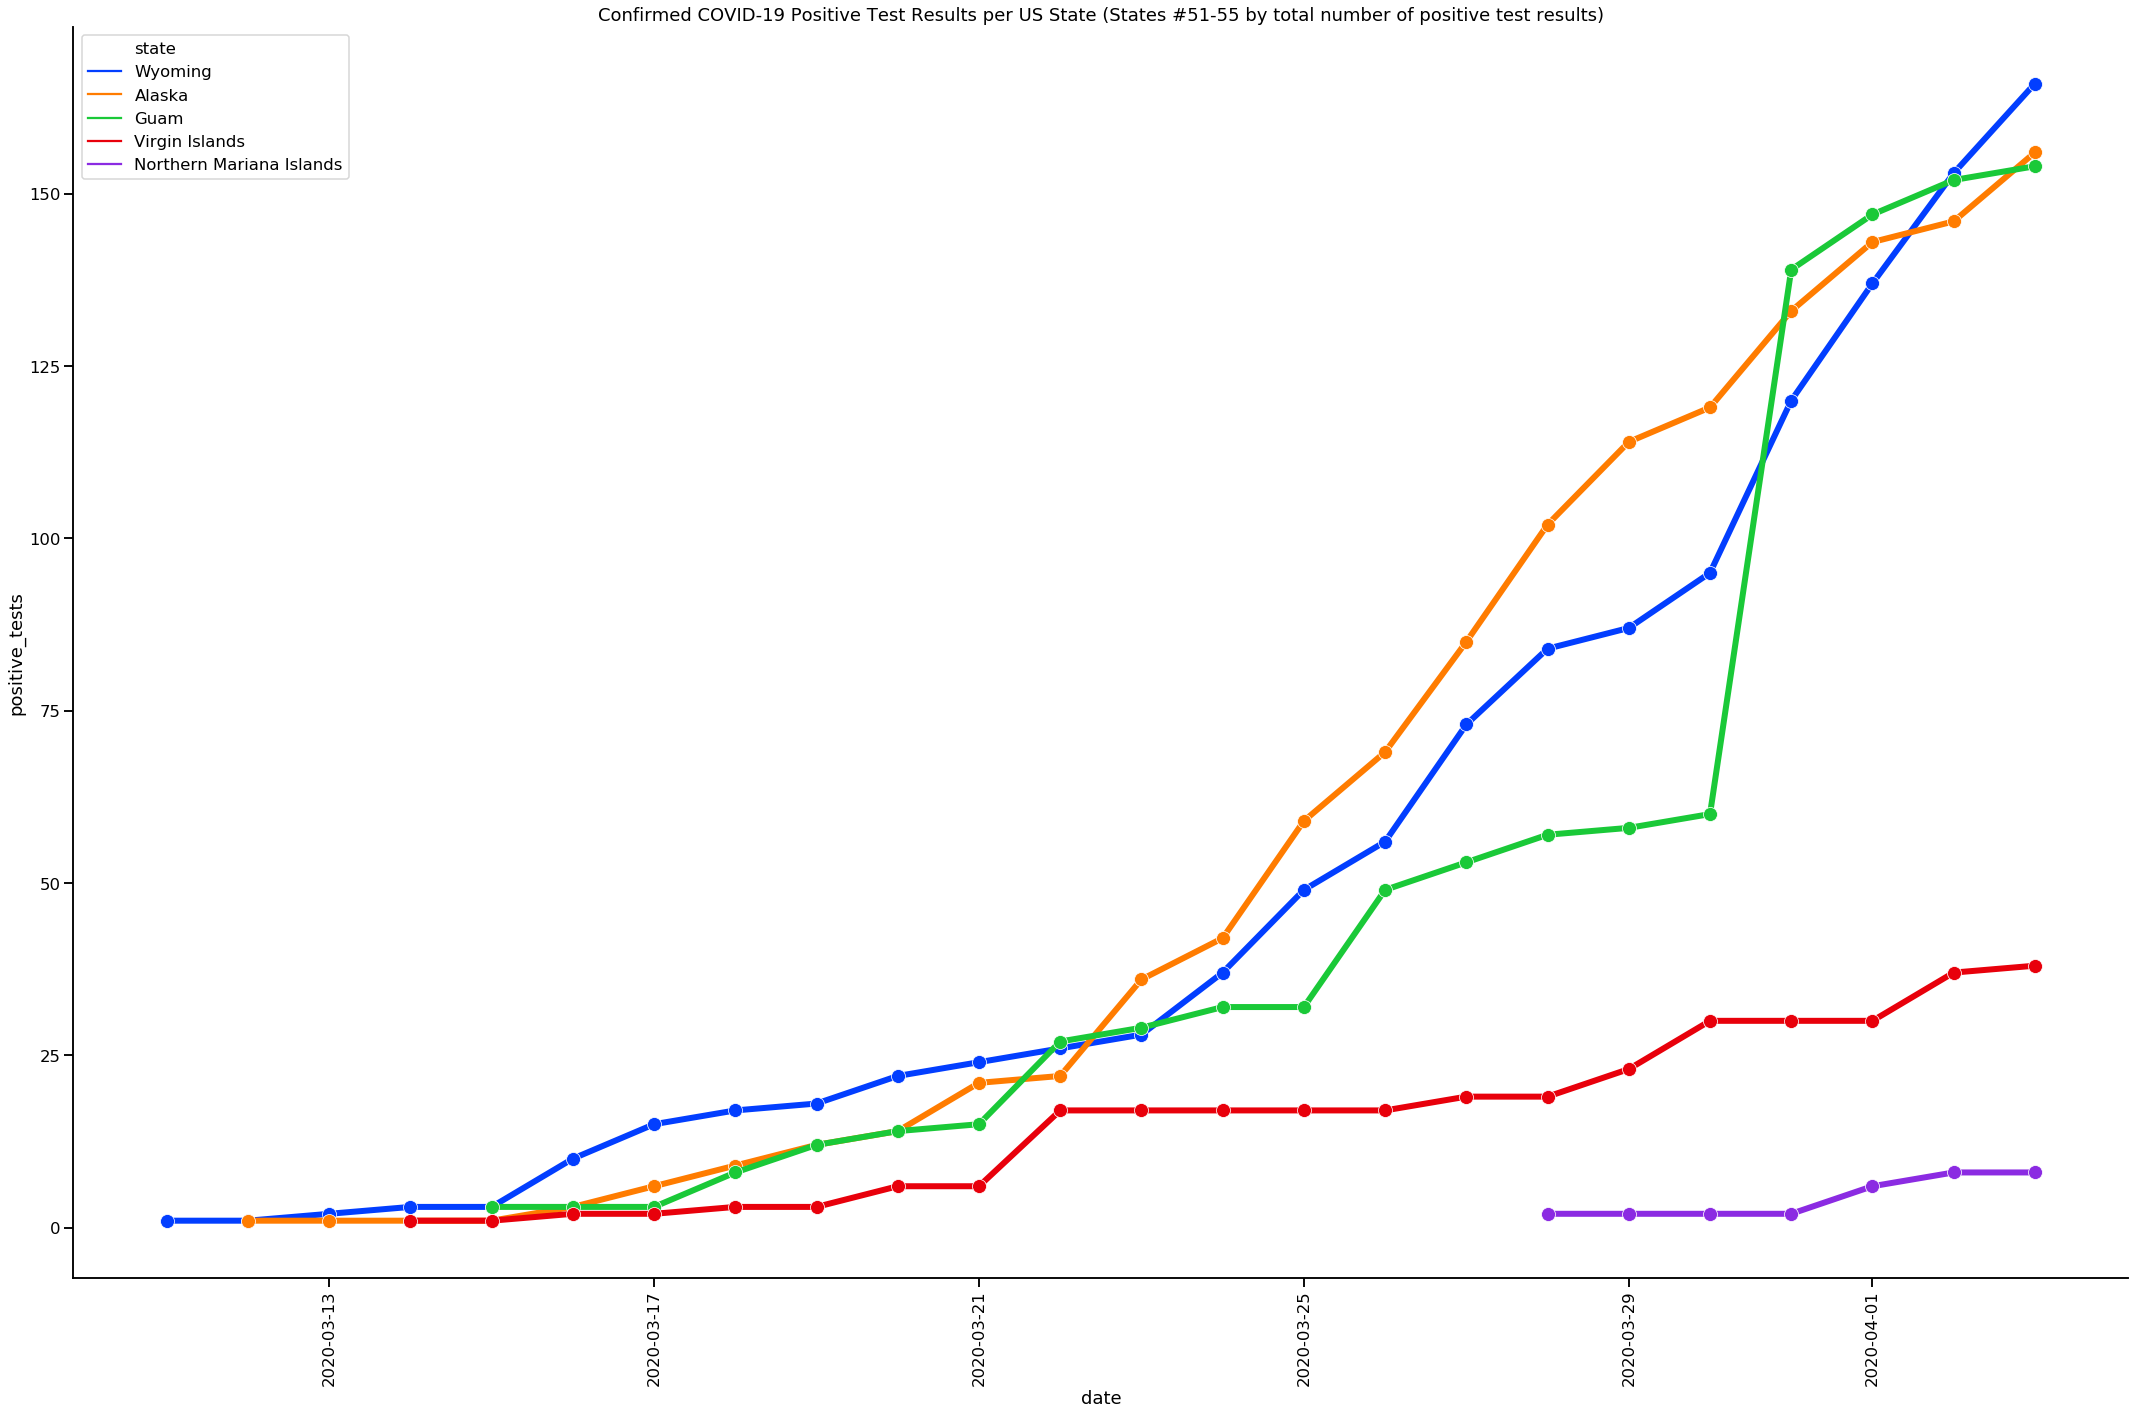

In [25]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)].sort_values(by='positive_tests', ascending=False)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of positive test results)')
    sns.despine()
    plt.tight_layout()
    plt.show()

In [26]:
# states_2_thru_10 = state_groups[0].copy()
# states_3_thru_10 = state_groups[0].copy()

# del(states_2_thru_10[0])
# del(states_3_thru_10[0:2])

# print(state_groups[0])
# print(states_2_thru_10)
# print(states_3_thru_10)

In [27]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #2-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

In [28]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #3-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

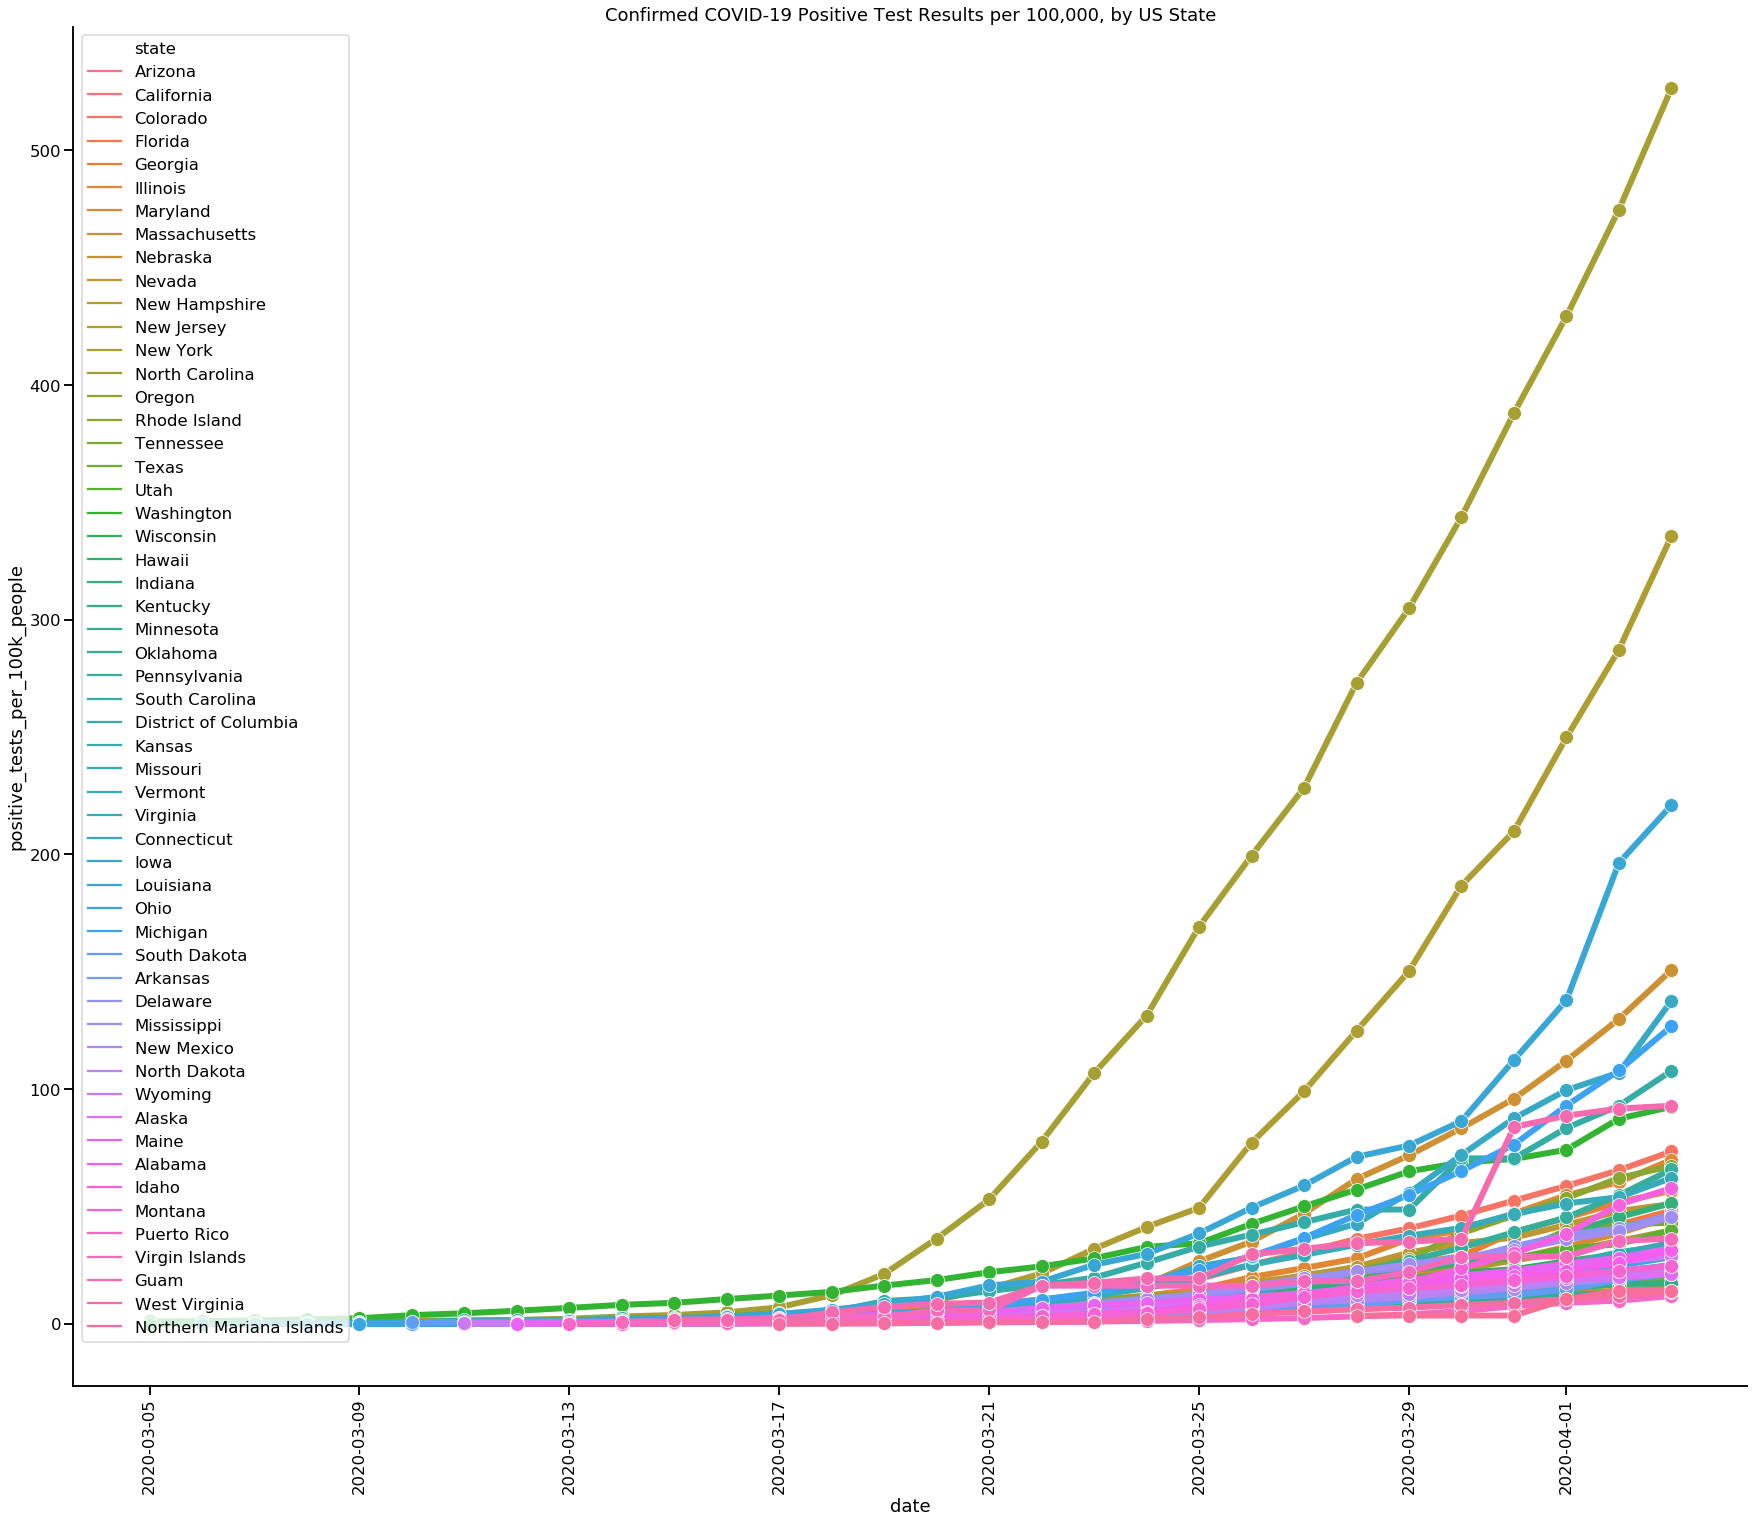

In [29]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['positive_tests_per_100k_people'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000, by US State')
plt.xticks(rotation=90);
sns.despine()

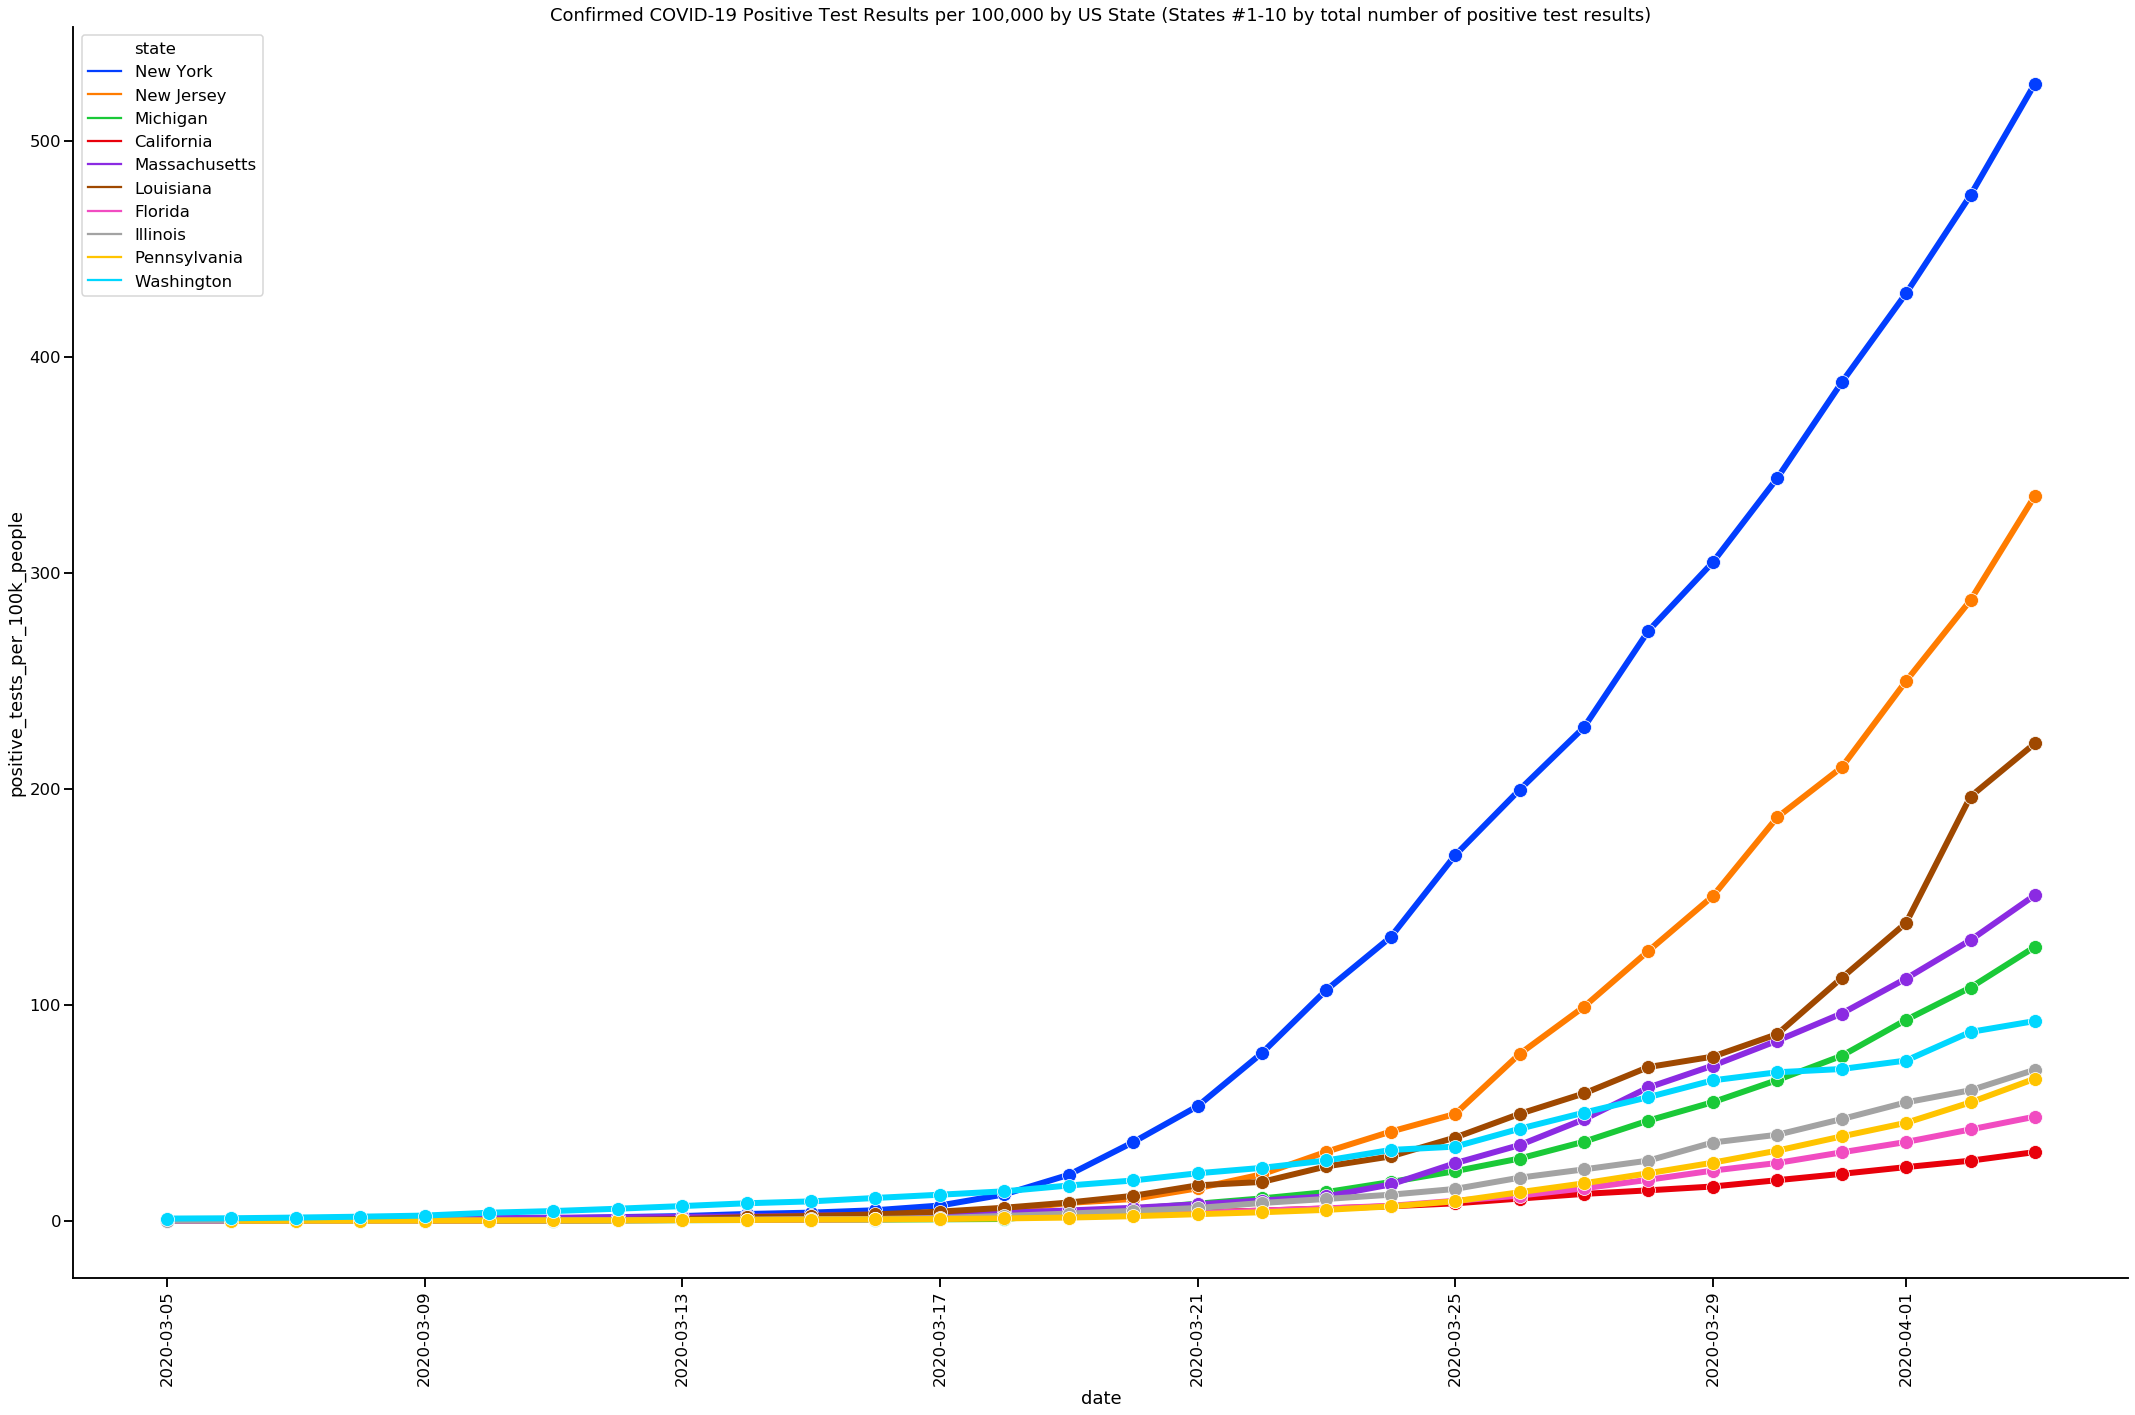

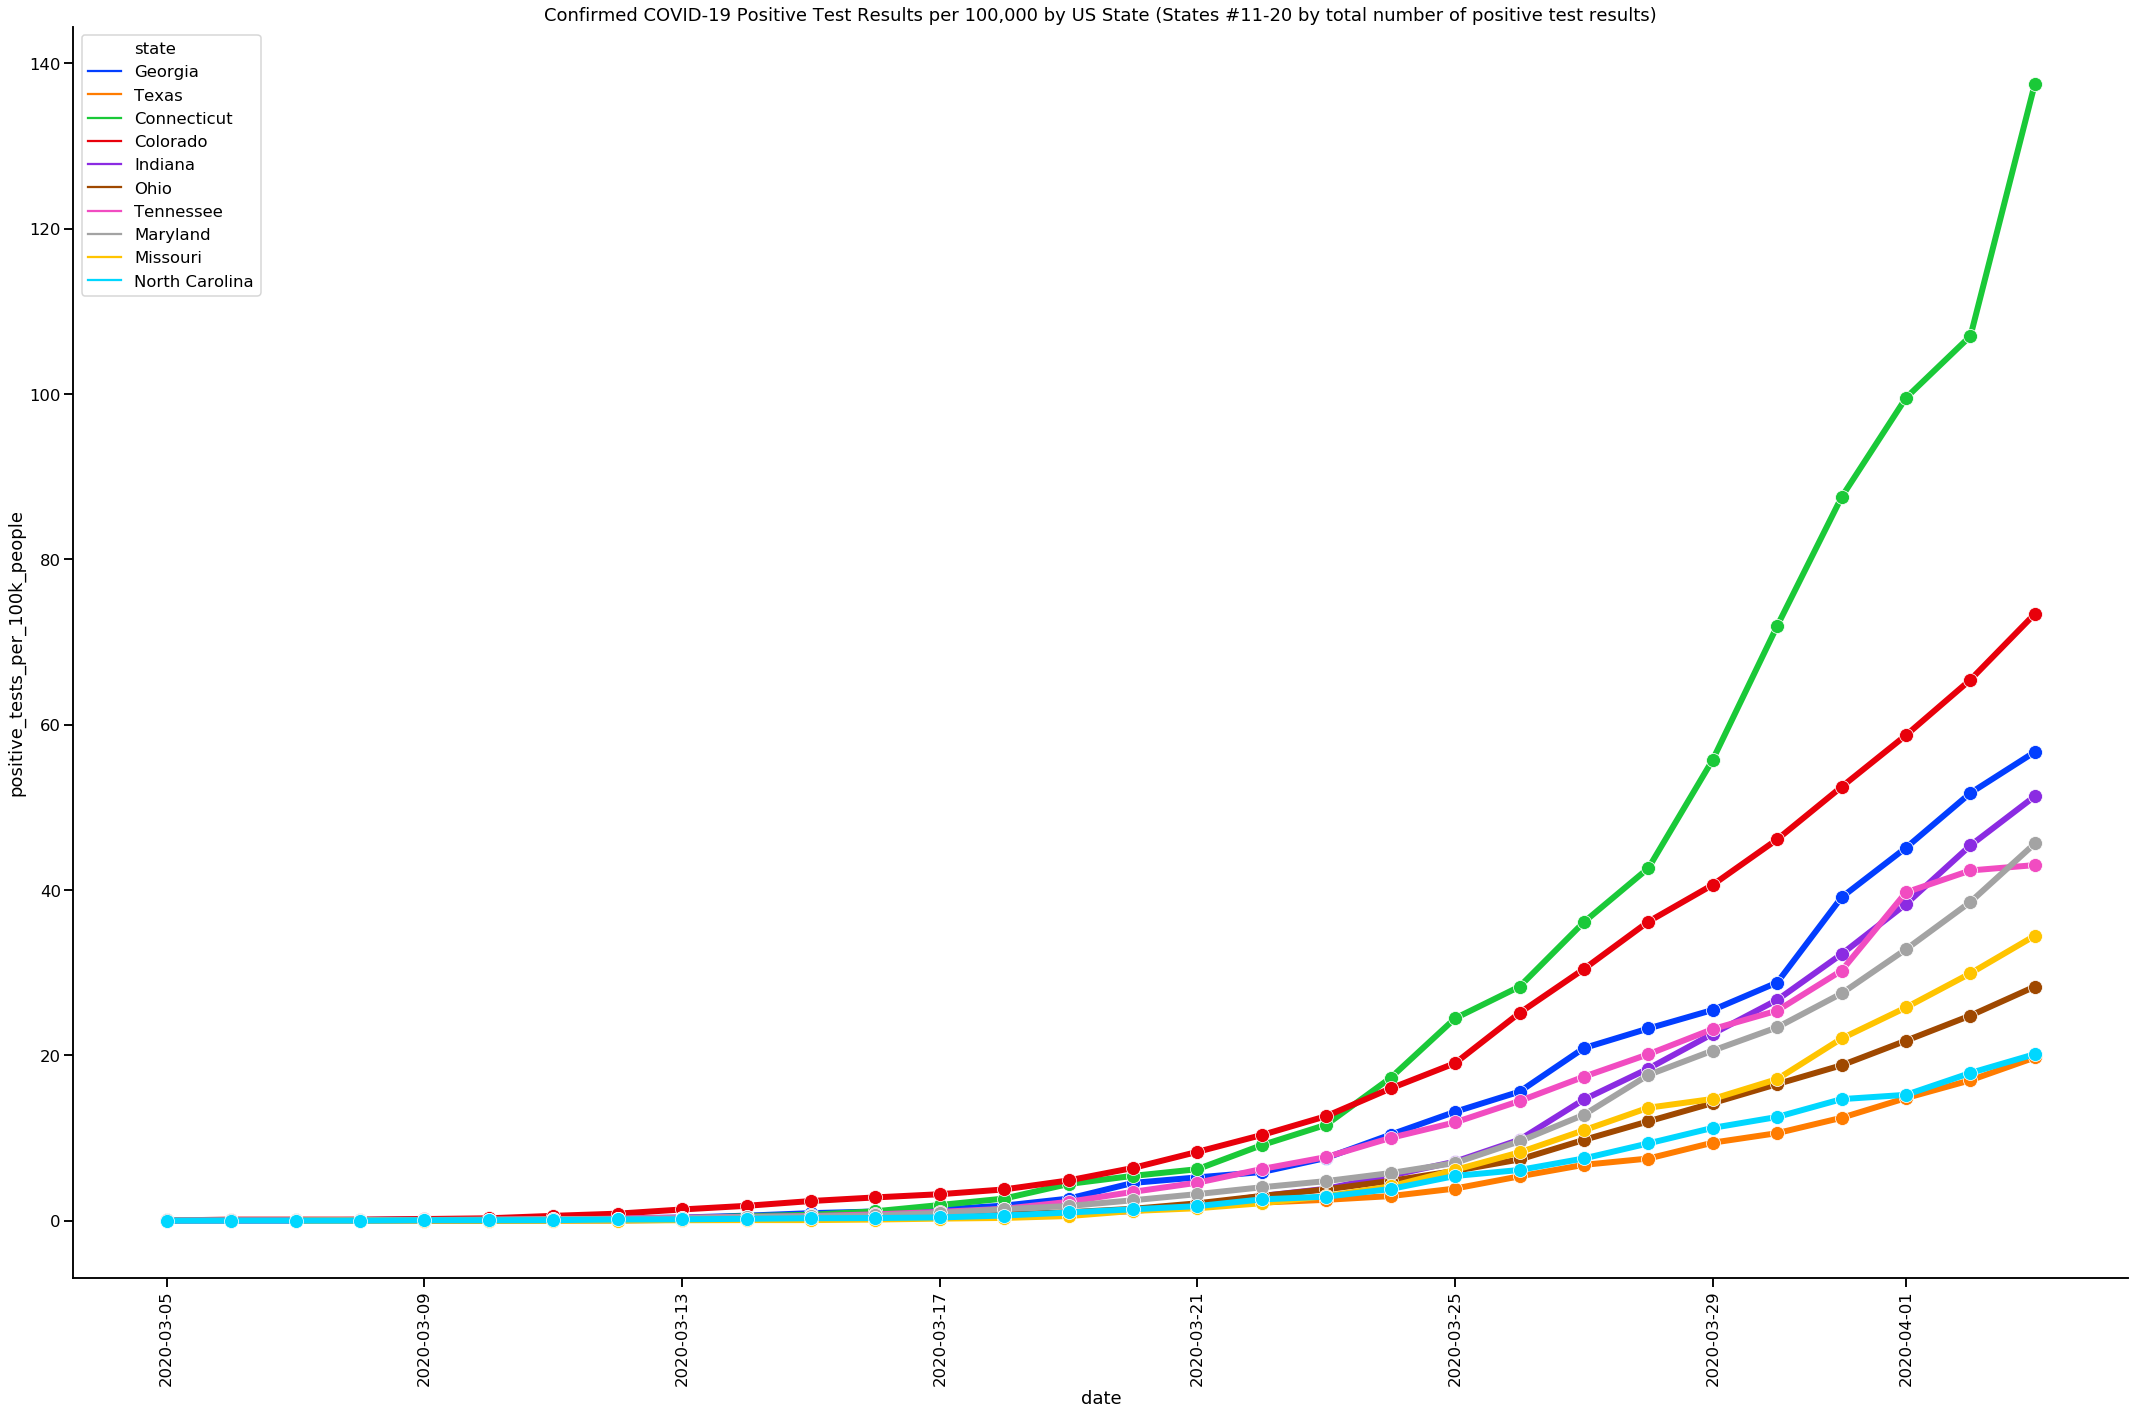

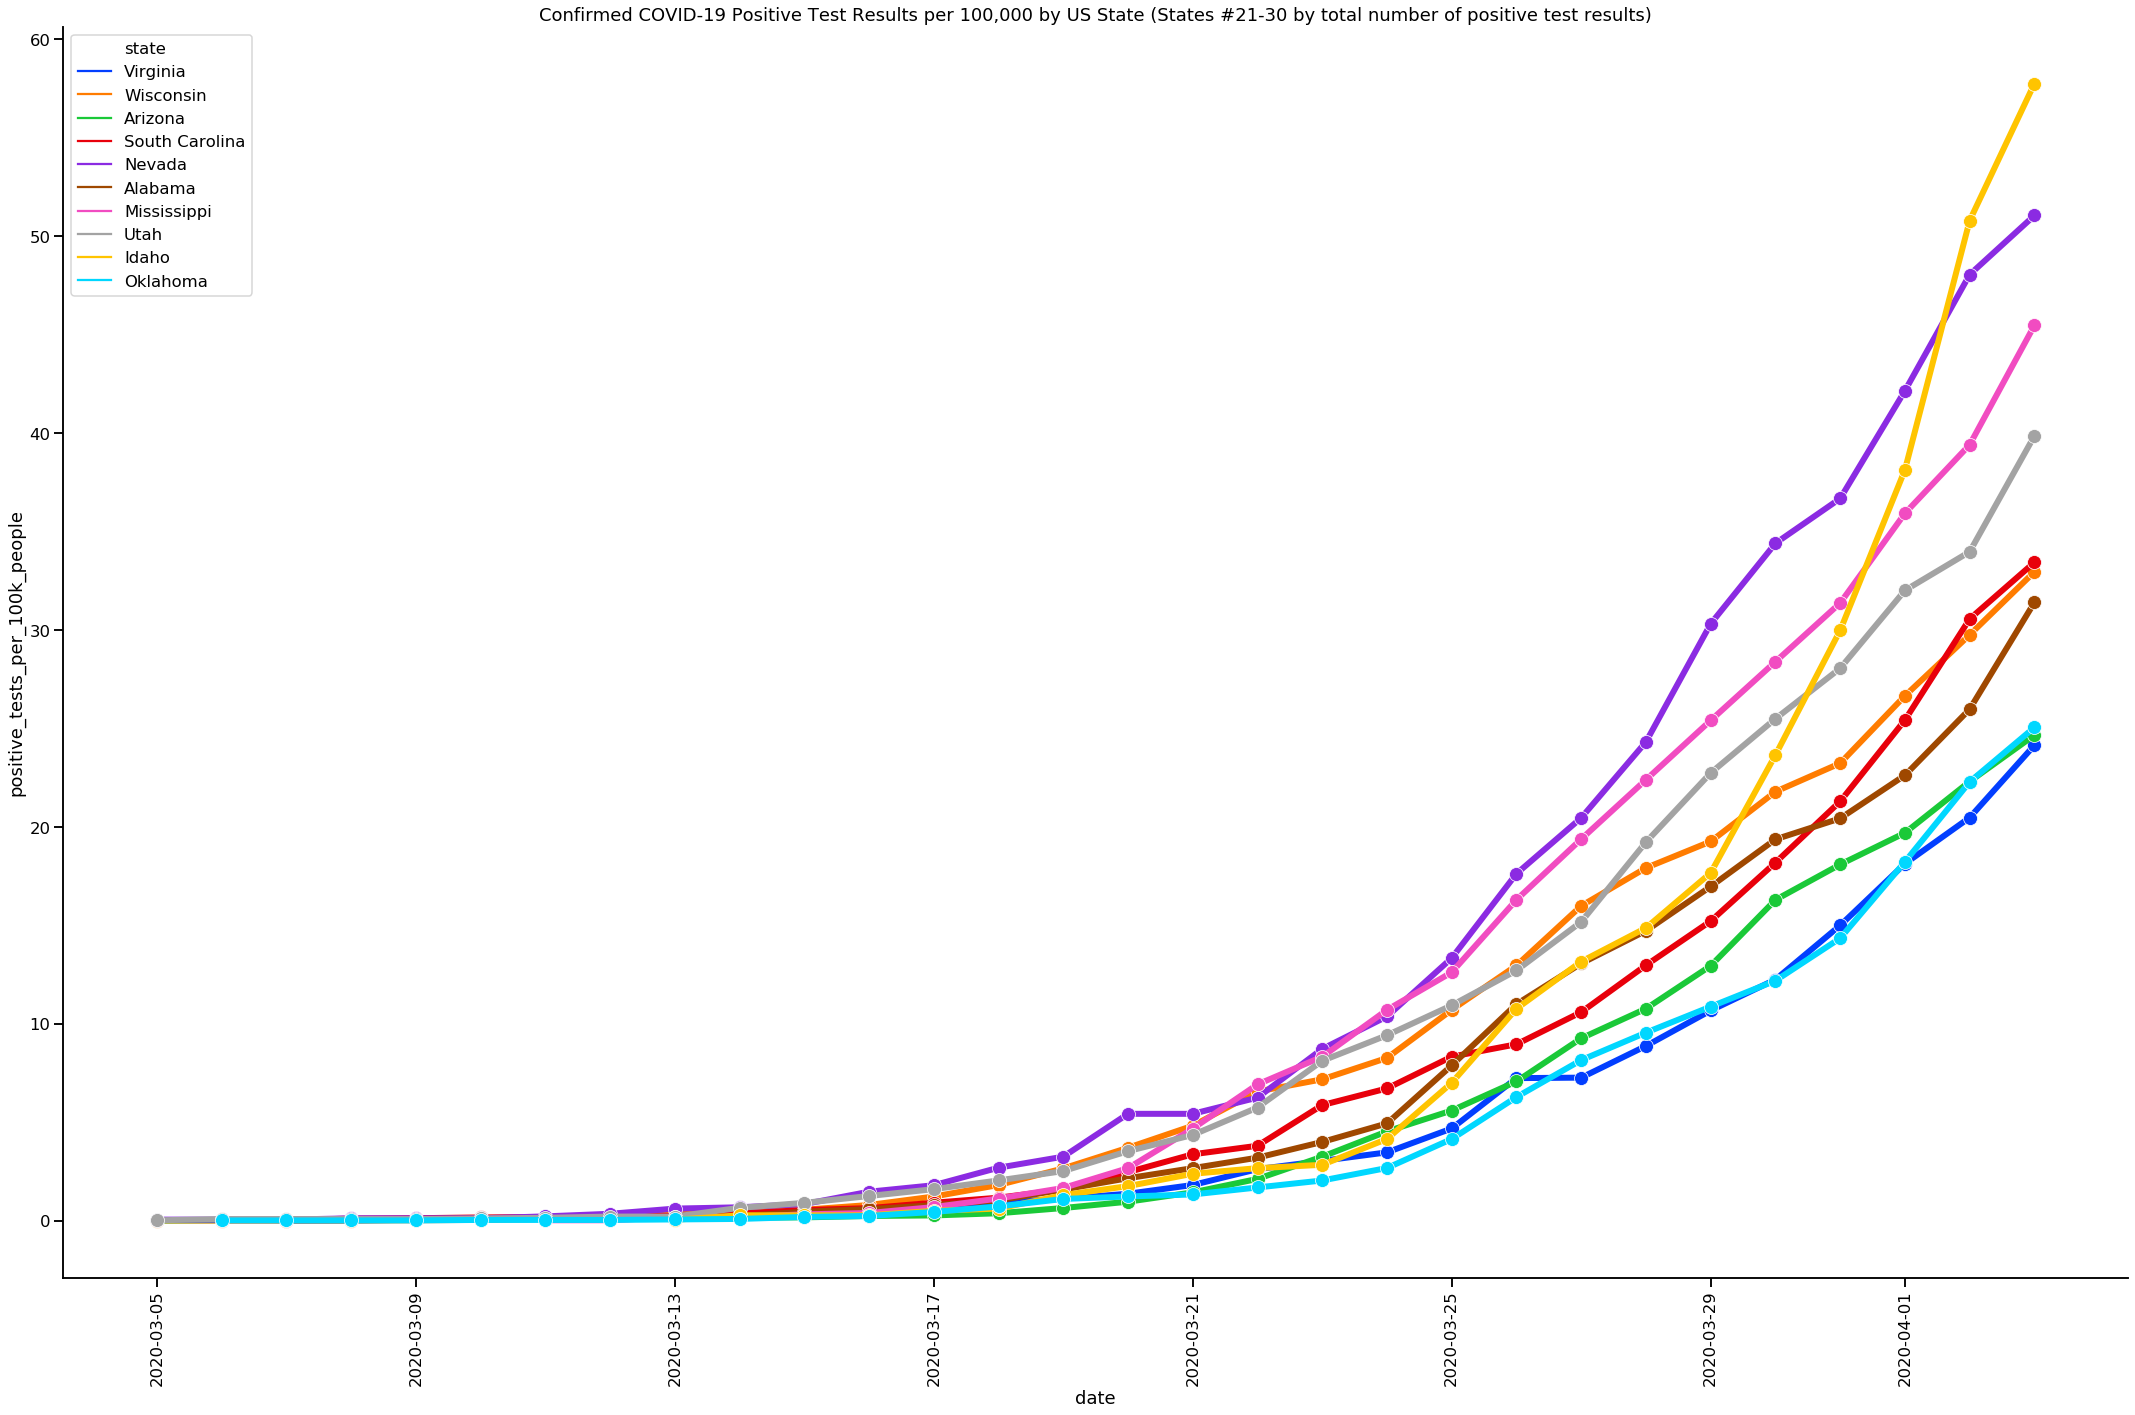

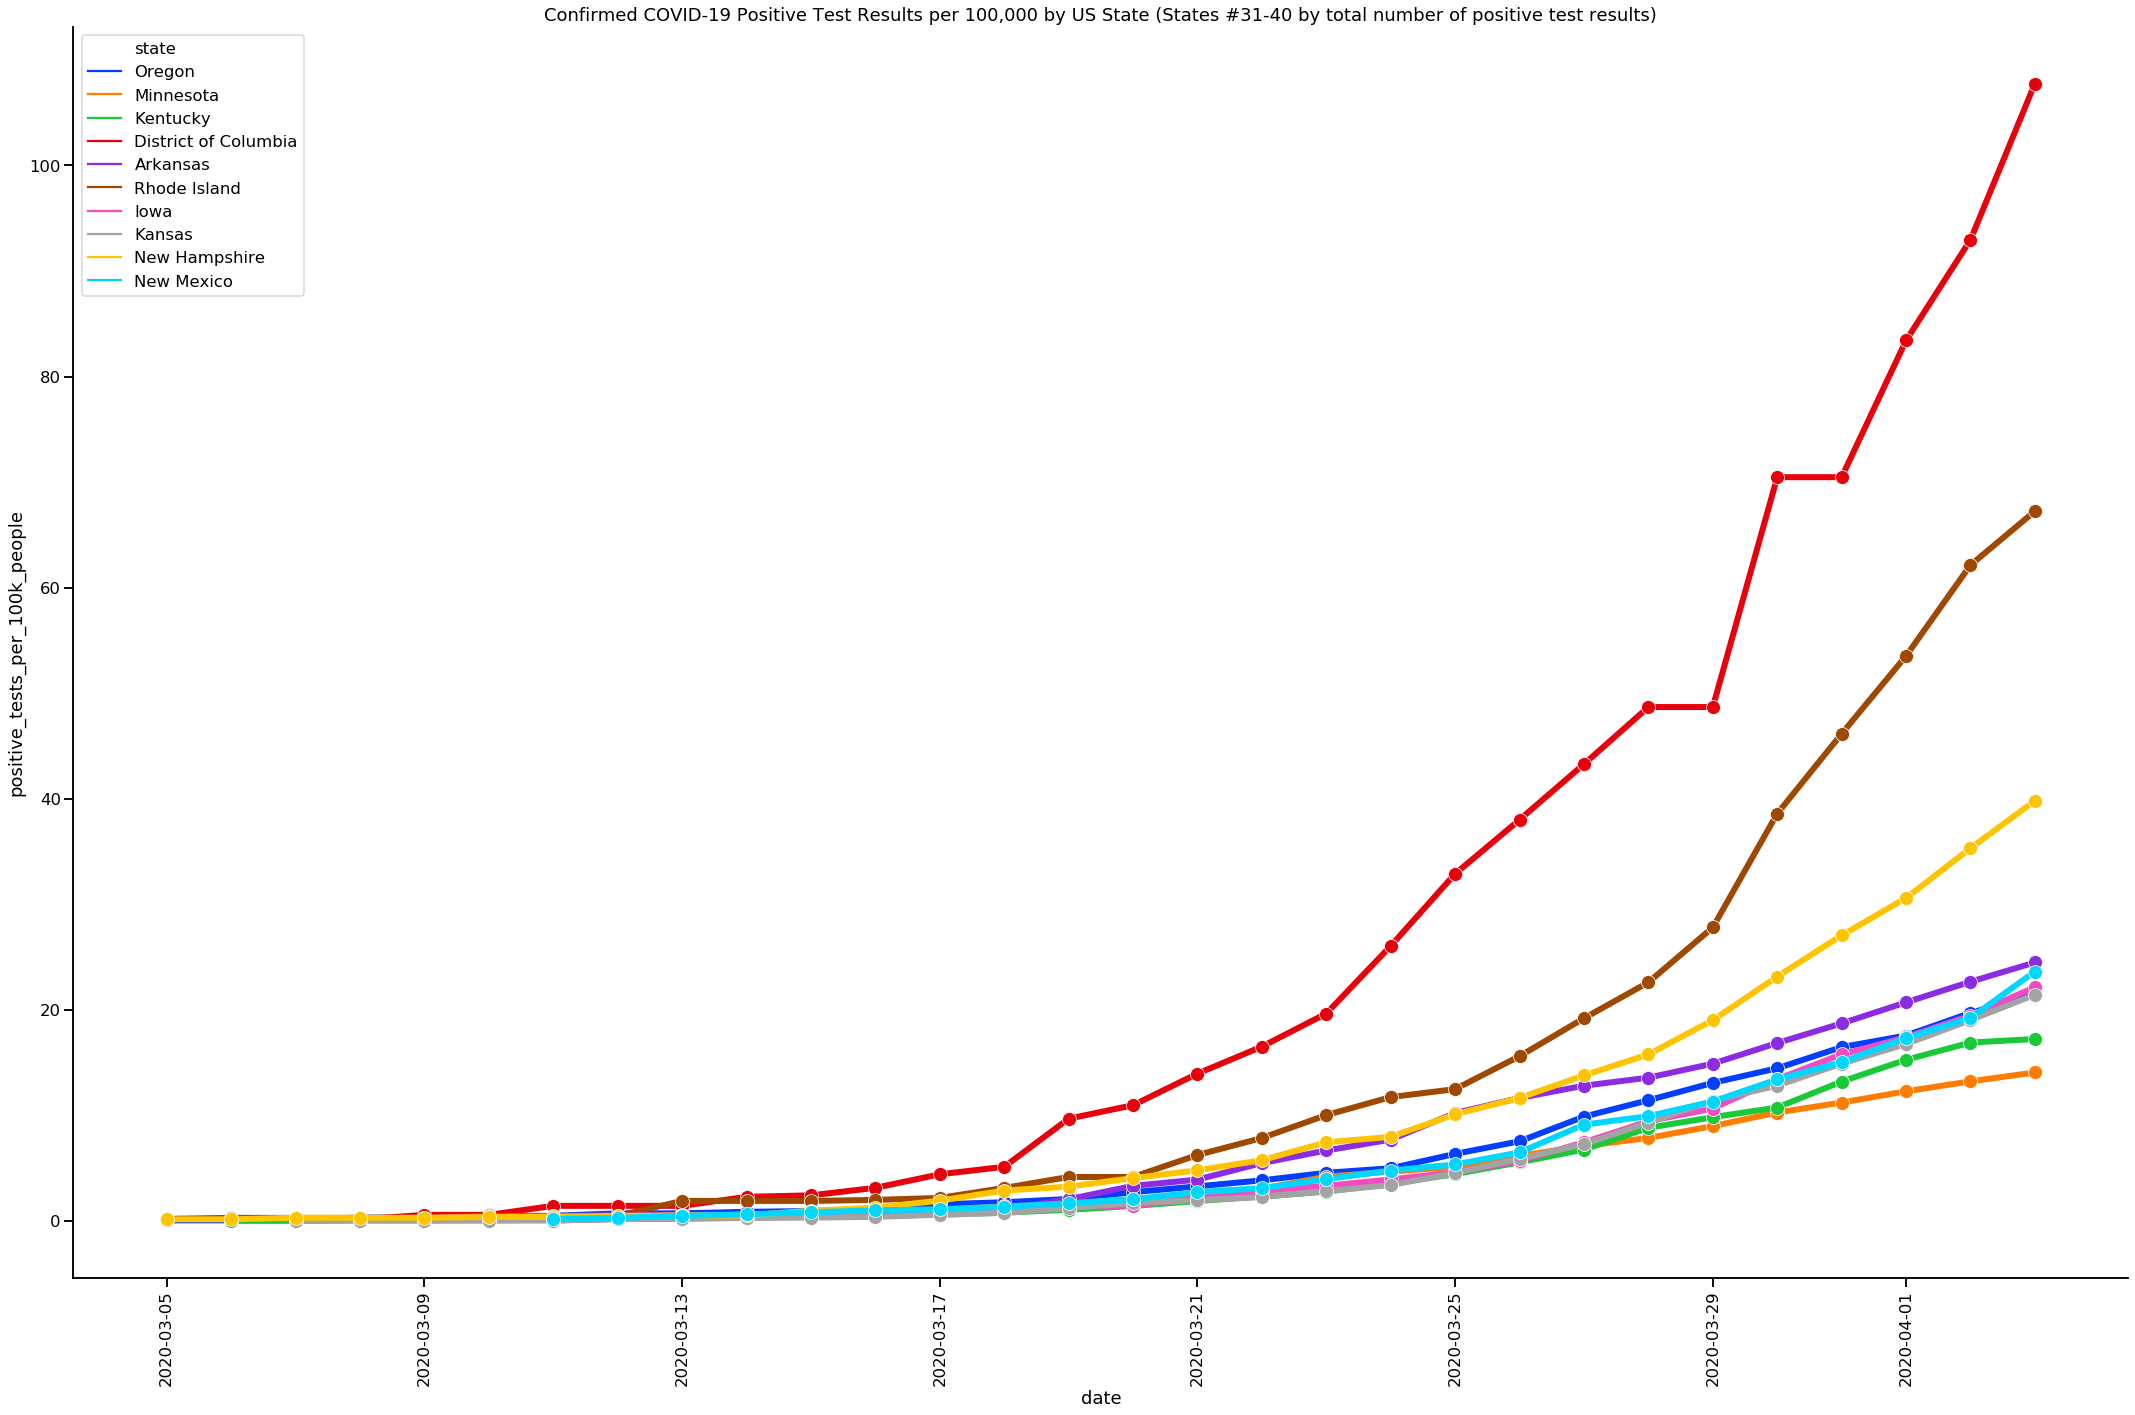

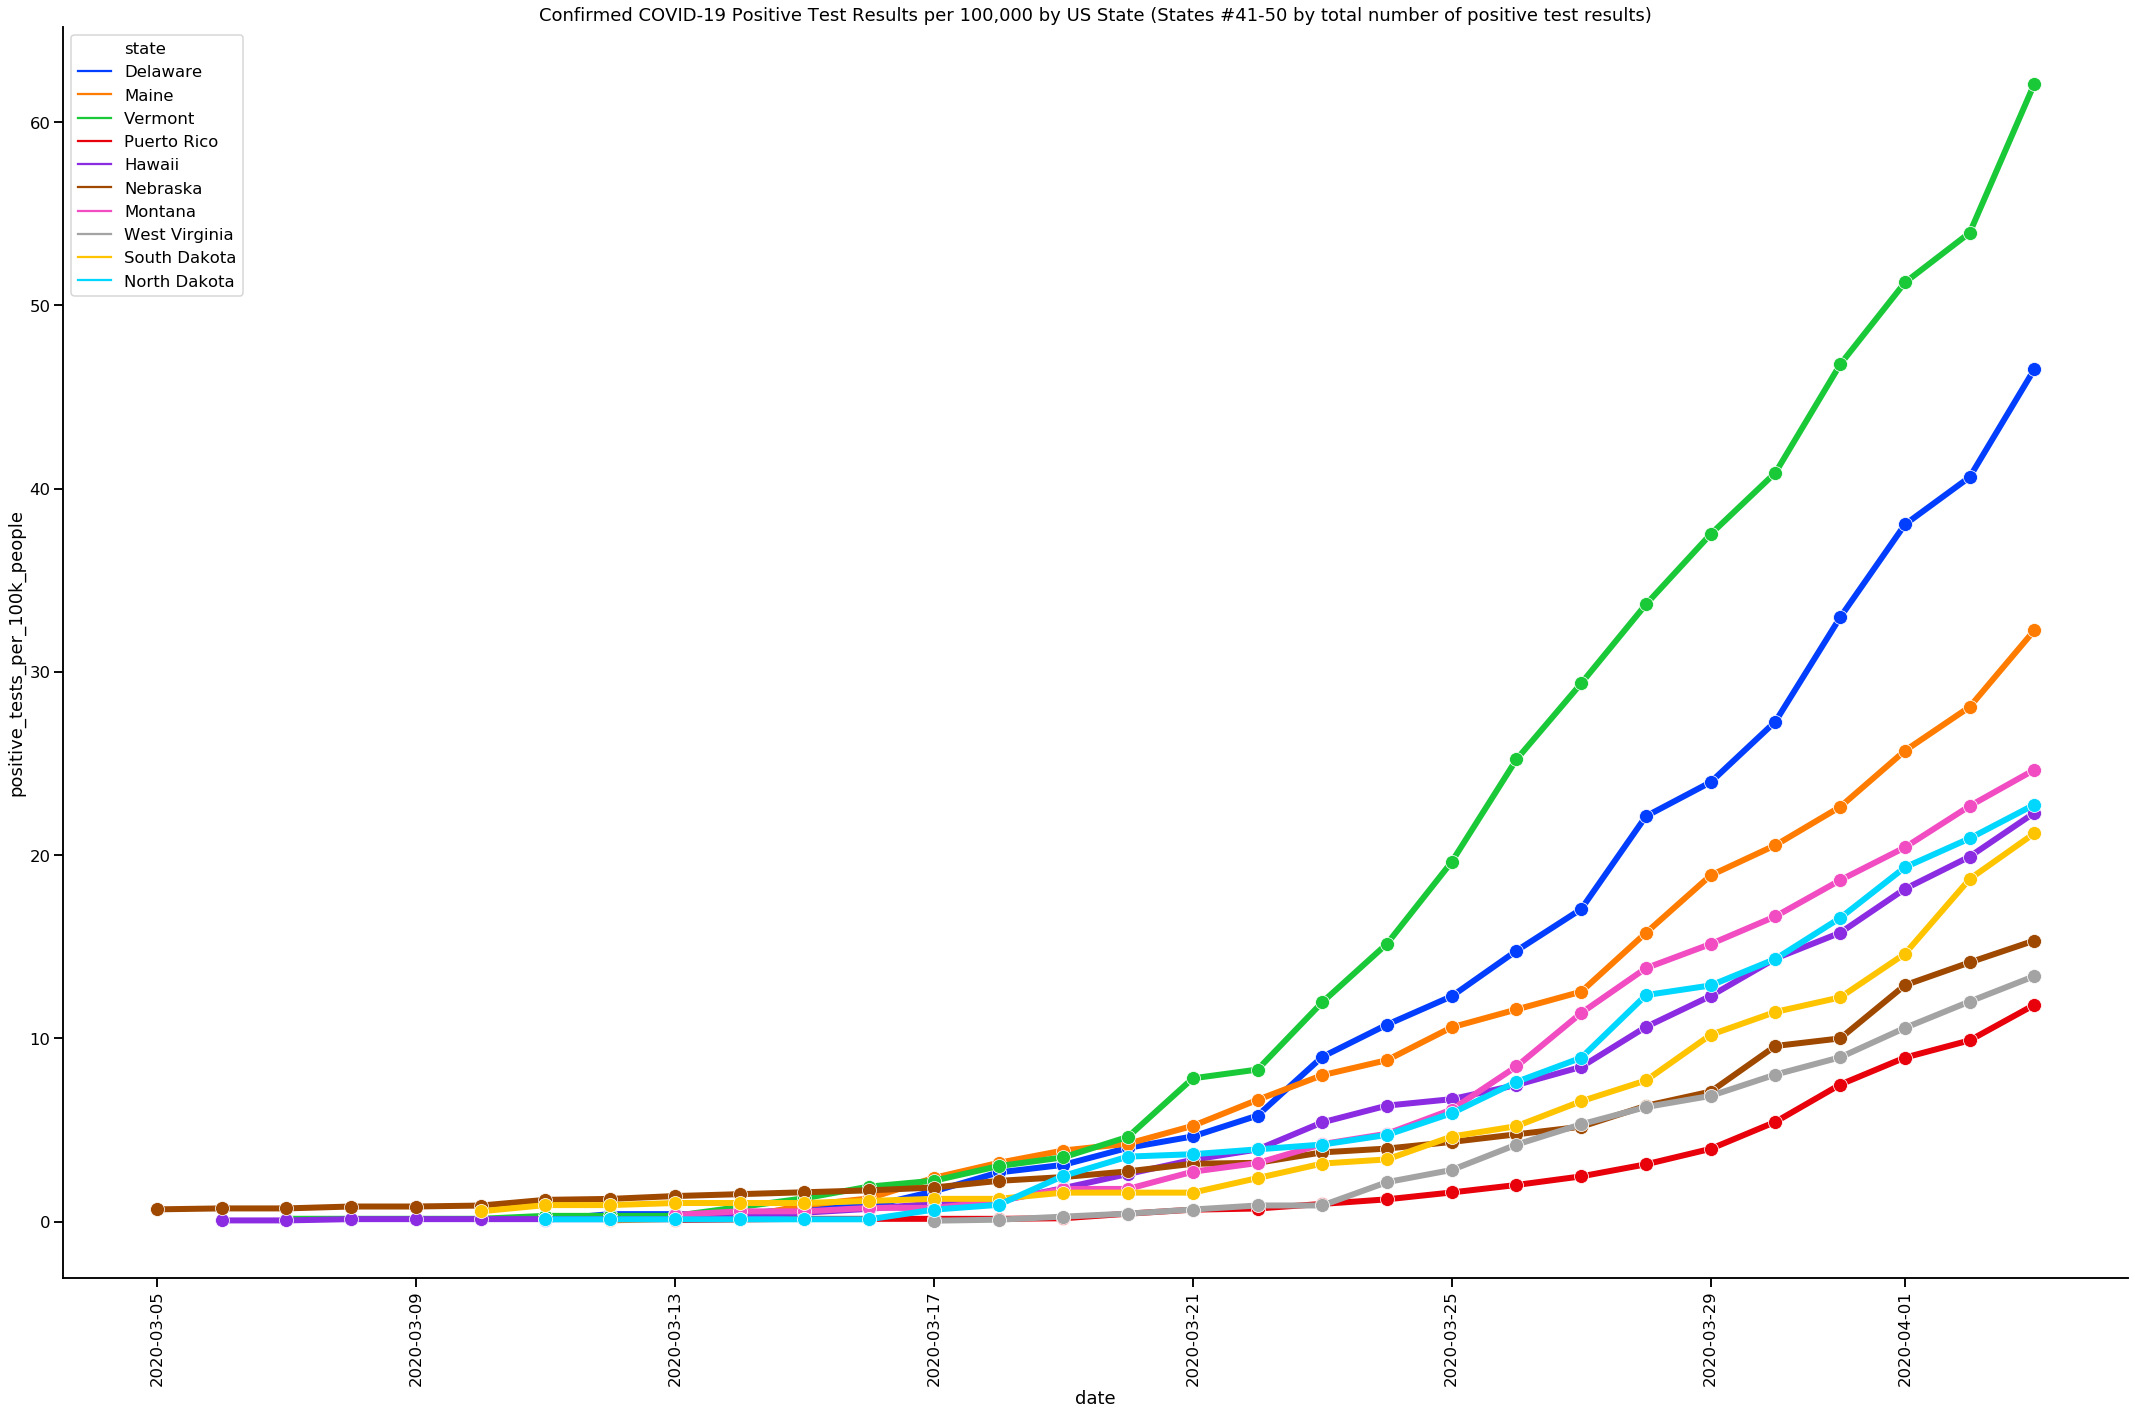

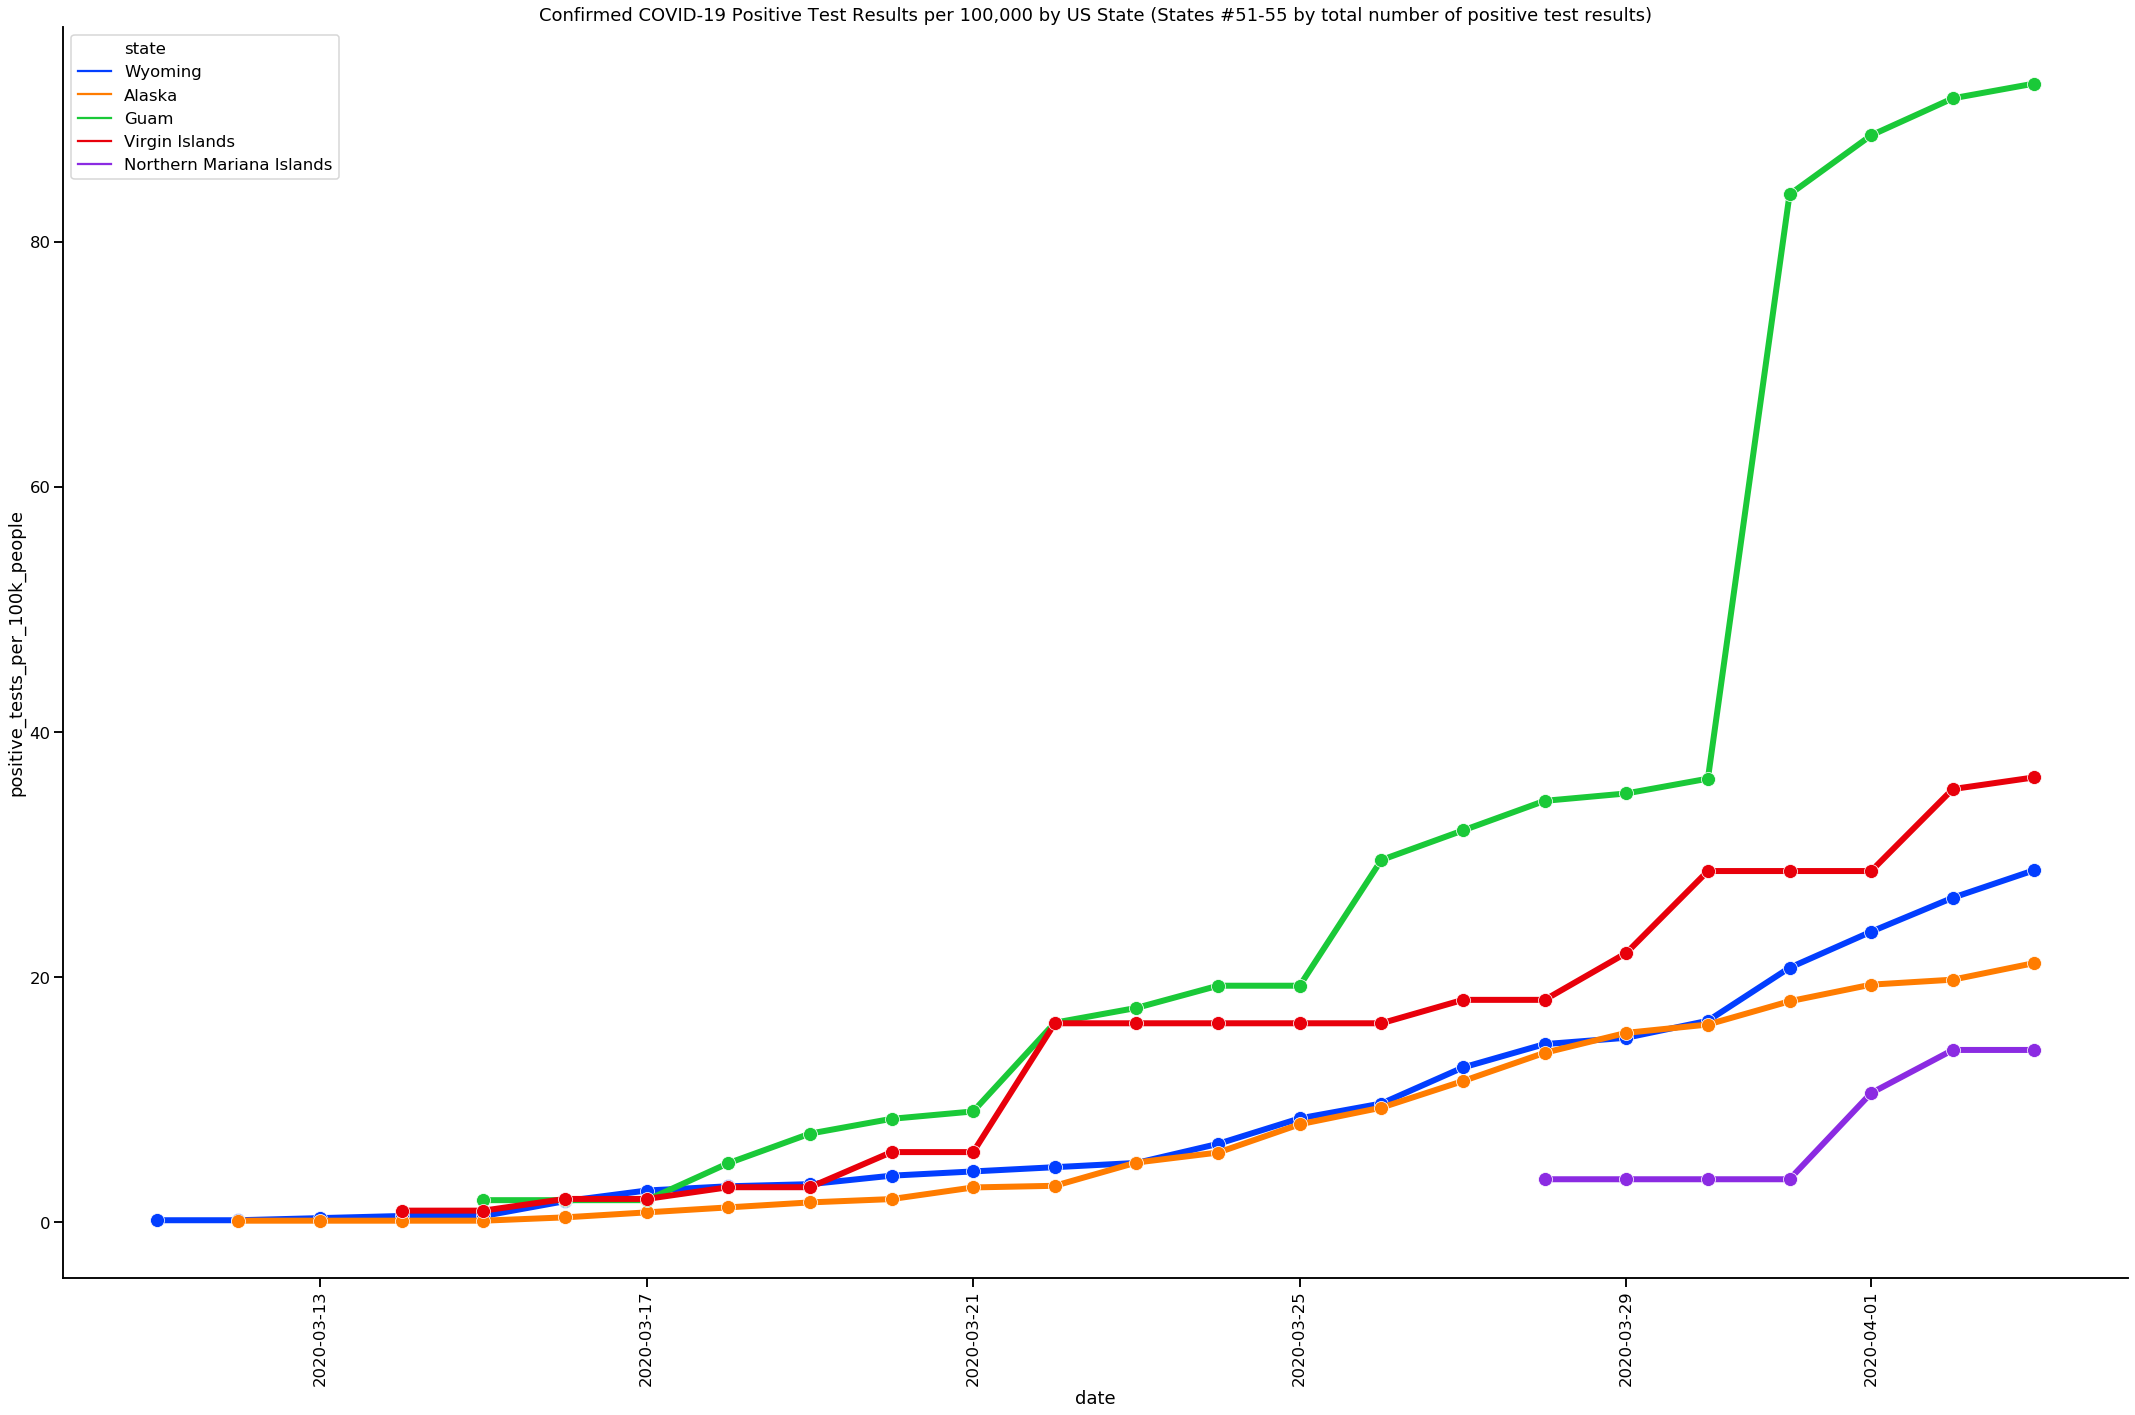

In [30]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)].sort_values(by='positive_tests', ascending=False)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of positive test results)')
    plt.tight_layout()
    sns.despine()
    plt.show()

In [31]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #2-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

In [32]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #3-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()